# DATA 606 Capstone Project: Evaluating the Efficacy of Public Works Projects on Reducing Crime in San Francisco 
# Phase 3
### In Part 1 notebook, I will:
- Make 2 datasets out of the cleaned dataset:
    - Pit Stop Neighborhoods sub-dataset
    - Non-Pit Stop Neighborhoods sub-dataset
- Perform Pearson Correlation Coefficient tests on Pit Stop Neighborhoods sub-dataset
    - Plot heatmaps of statistically significant negative correlations between incident categories and number of pit stops in each Pit Stop neighborhood
    
### In Part 2 Notebook, I will:
- Predict where and what crimes will occur using Machine Learning algorithms
    - Use Label Encoder
    - Split datasets into train and test sets
    - Run Decision Tree Classifiers and Random Forest Classifiers on Pit Stop Neighborhoods and Non-Pit Stop Neighborhoods sub-datasets separately, predicting the following variables:
        - Incident Severity Category (Decision Tree Classifiers only)
        - Neighborhood Name
        - Incident Category
    - Plot confusion matrices for the predictions of each variable
    - For the Decision Tree Classifier only:
        - Make plotly maps using the neighborhood predictions and incident category predictions of both the Pit Stop Neighborhoods sub-dataset and Non-Pit Stop Neighborhoods sub-dataset

In [102]:
#import statements
!pip install --upgrade pip
import pandas as pd
import numpy as np
import requests
import io
from matplotlib import pyplot as plt
!pip install seaborn==0.9.0
import seaborn as sns
!pip install "notebook>=5.3" "ipywidgets>=7.2"
!pip install plotly==4.10.0

import plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
#Import NEW CLEANED Combined PD Incidents 2003-Present data set
#data set also available on Github project page
cleaned_incident_data = pd.read_csv(r"C:\Users\sdelp\Documents\Becky\NEW CLEANED Combined PD Incidents 2003-Present.csv",
                                    dtype = {'Address': str, 'Analysis Neighborhoods': str, 'Areas of Vulnerability, 2016': str,
                                    'Current Police Districts': float, 'Current Supervisor Districts': float, 
                                    'Incident Category': str, 'Incident Code': int, 'Incident Date': str,
                                    'Incident Day of Week': str, 'Incident Description': str, 'Incident Number': int, 
                                    'Incident Time': str, 'Incident Year': int, 'Latitude': float, 'Longitude': float, 
                                    'Police District': str, 'Resolution': str, 'SF Find Neighborhoods': float, 
                                    'Incident Severity Category': int, 'Neighborhood Name': str, 'Incident Counter': int})

In [104]:
#Convert to a dataframe
cleaned_incident_df = pd.DataFrame(cleaned_incident_data, columns = ['Address', 'Analysis Neighborhoods',
                                   'Areas of Vulnerability, 2016', 'Current Police Districts', 'Current Supervisor Districts',
                                   'Incident Category', 'Incident Code', 'Incident Date', 'Incident Day of Week',
                                   'Incident Description', 'Incident Number', 'Incident Time', 'Incident Year', 'Latitude', 
                                   'Longitude', 'Police District', 'Resolution', 'SF Find Neighborhoods', 
                                   'Incident Severity Category', 'Neighborhood Name', 'Incident Counter'])

In [105]:
cleaned_incident_df.head()

,Address,Analysis Neighborhoods,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Code,Incident Date,Incident Day of Week,Incident Description,...,Incident Time,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Neighborhood Name,Incident Counter
0,3400 Block of PIERCE ST,13.0,1.0,4.0,6.0,WARRANTS,63010,2011-07-01 00:00:00,Friday,WARRANT ARREST,...,1900-01-01 08:00:00,2011,37.802151,-122.439758,NORTHERN,"ARREST, BOOKED",17.0,3,Marina,1
1,0 Block of UNITEDNATIONS PZ,36.0,2.0,5.0,10.0,DRUG/NARCOTIC,16010,2005-10-18 00:00:00,Tuesday,POSSESSION OF MARIJUANA,...,1900-01-01 14:30:00,2005,37.779944,-122.414318,TENDERLOIN,"ARREST, BOOKED",21.0,1,Tenderloin,1
2,1500 Block of KIRKWOOD AV,1.0,2.0,2.0,9.0,MOTOR VEHICLE THEFT,7055,2005-01-29 00:00:00,Saturday,RECOVERED VEHICLE - STOLEN OUTSIDE SF,...,1900-01-01 13:45:00,2005,37.737576,-122.388799,BAYVIEW,NONE,86.0,0,Bayview Hunters Point,1
3,900 Block of COLUMBUS AV,32.0,1.0,6.0,3.0,NON-CRIMINAL,64020,2011-06-02 00:00:00,Thursday,"AIDED CASE, MENTAL DISTURBED",...,1900-01-01 02:52:00,2011,37.803109,-122.414354,CENTRAL,PSYCHOPATHIC CASE,107.0,3,Russian Hill,1
4,1500 Block of BAY SHORE BL,1.0,2.0,2.0,9.0,MOTOR VEHICLE THEFT,7024,2003-02-01 00:00:00,Saturday,STOLEN TRAILER,...,1900-01-01 08:00:00,2003,37.724556,-122.401097,BAYVIEW,NONE,86.0,0,Bayview Hunters Point,1


In [106]:
#Define a function that looks at neighborhood name and returns how many pit stops are in that neighborhood
def pit_stop(row):
    if row == 'Bayview Hunters Point': return 1
    elif row == 'Haight Ashbury': return 1
    elif row == 'Castro/Upper Market': return 2
    elif row == 'Financial District/South Beach': return 2
    elif row == 'Golden Gate Park': return 2
    elif row == 'Mission': return 5
    elif row == 'North Beach': return 1
    elif row == 'South of Market': return 2
    elif row == 'Sunset/Parkside': return 1
    elif row == 'Tenderloin': return 9
    else: return 0

In [107]:
#Apply pit_stop function to dataframe and add a column named Number of Pit Stops
cleaned_incident_df['Number of Pit Stops'] = cleaned_incident_df['Neighborhood Name'].apply(pit_stop)

In [108]:
#Sort dataframe by year
cleaned_incident_df.sort_values(by = 'Incident Year', ascending = True)

,Address,Analysis Neighborhoods,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Code,Incident Date,Incident Day of Week,Incident Description,...,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Neighborhood Name,Incident Counter,Number of Pit Stops
885115,BROADWAY ST / KEARNY ST,23.0,2.0,6.0,3.0,DRUG/NARCOTIC,16626,2003-10-25 00:00:00,Saturday,TRANSPORTATION OF COCAINE,...,2003,37.798018,-122.405476,CENTRAL,"ARREST, BOOKED",106.0,1,North Beach,1,1
950550,800 Block of FOLSOM ST,34.0,2.0,1.0,10.0,LARCENY/THEFT,6244,2003-02-08 00:00:00,Saturday,GRAND THEFT FROM LOCKED AUTO,...,2003,37.781167,-122.402344,SOUTHERN,NONE,32.0,0,South of Market,1,2
281902,TURK ST / LEAVENWORTH ST,36.0,2.0,5.0,10.0,WARRANTS,63010,2003-09-26 00:00:00,Friday,WARRANT ARREST,...,2003,37.782793,-122.414056,TENDERLOIN,"ARREST, BOOKED",20.0,3,Tenderloin,1,9
876858,HYDE ST / EDDY ST,36.0,2.0,5.0,10.0,LOITERING,19075,2003-09-29 00:00:00,Monday,LOITERING,...,2003,37.783516,-122.415885,TENDERLOIN,NONE,20.0,1,Tenderloin,1,9
876857,HAIGHT ST / CENTRAL AV,3.0,1.0,7.0,11.0,OTHER OFFENSES,65016,2003-01-10 00:00:00,Friday,"DRIVERS LICENSE, SUSPENDED OR REVOKED",...,2003,37.770426,-122.443650,PARK,"ARREST, CITED",25.0,3,Haight Ashbury,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353960,NaN,35.0,1.0,10.0,7.0,LARCENY/THEFT,6224,2020-02-21 00:00:00,Friday,"THEFT, FROM UNLOCKED VEHICLE, >$950",...,2020,37.736182,-122.504228,TARAVAL,OPEN OR ACTIVE,40.0,0,Sunset/Parkside,1,1
1353959,NaN,8.0,2.0,6.0,3.0,LARCENY/THEFT,6374,2020-02-18 00:00:00,Tuesday,"THEFT, OTHER PROPERTY, >$950",...,2020,37.790247,-122.400555,CENTRAL,OPEN OR ACTIVE,108.0,0,Financial District/South Beach,1,2
1353958,NaN,26.0,2.0,2.0,9.0,LARCENY/THEFT,6224,2020-02-18 00:00:00,Tuesday,"THEFT, FROM UNLOCKED VEHICLE, >$950",...,2020,37.755096,-122.392884,BAYVIEW,OPEN OR ACTIVE,54.0,0,Potrero Hill,1,0
1353956,NaN,34.0,2.0,1.0,10.0,LARCENY/THEFT,6372,2020-02-20 00:00:00,Thursday,"THEFT, OTHER PROPERTY, $50-$200",...,2020,37.782024,-122.401160,SOUTHERN,OPEN OR ACTIVE,32.0,0,South of Market,1,2


In [109]:
#Split datasets into two: 1 dataset contains incidents in pit stop neighborhoods, the other contains incidents in non-pit stop
#neighborhoods

#Create pit stop neighborhood dataframe
pitstop_nb_incidents_df = cleaned_incident_df[cleaned_incident_df['Number of Pit Stops'] != 0]

In [110]:
pitstop_nb_incidents_df.head()

,Address,Analysis Neighborhoods,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Code,Incident Date,Incident Day of Week,Incident Description,...,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Neighborhood Name,Incident Counter,Number of Pit Stops
1,0 Block of UNITEDNATIONS PZ,36.0,2.0,5.0,10.0,DRUG/NARCOTIC,16010,2005-10-18 00:00:00,Tuesday,POSSESSION OF MARIJUANA,...,2005,37.779944,-122.414318,TENDERLOIN,"ARREST, BOOKED",21.0,1,Tenderloin,1,9
2,1500 Block of KIRKWOOD AV,1.0,2.0,2.0,9.0,MOTOR VEHICLE THEFT,7055,2005-01-29 00:00:00,Saturday,RECOVERED VEHICLE - STOLEN OUTSIDE SF,...,2005,37.737576,-122.388799,BAYVIEW,NONE,86.0,0,Bayview Hunters Point,1,1
4,1500 Block of BAY SHORE BL,1.0,2.0,2.0,9.0,MOTOR VEHICLE THEFT,7024,2003-02-01 00:00:00,Saturday,STOLEN TRAILER,...,2003,37.724556,-122.401097,BAYVIEW,NONE,86.0,0,Bayview Hunters Point,1,1
5,400 Block of DAVIS CT,8.0,1.0,6.0,3.0,LARCENY/THEFT,6243,2006-02-12 00:00:00,Sunday,PETTY THEFT FROM LOCKED AUTO,...,2006,37.796715,-122.398188,CENTRAL,NONE,77.0,0,Financial District/South Beach,1,2
7,2600 Block of MISSION ST,20.0,2.0,3.0,2.0,LARCENY/THEFT,6304,2010-04-23 00:00:00,Friday,GRAND THEFT FROM A BUILDING,...,2010,37.754626,-122.418600,MISSION,NONE,53.0,0,Mission,1,5


In [111]:
pitstop_nb_incidents_df.shape

(832430, 22)

In [112]:
#Make a dataframe that includes incidents from all non-pit stop neighborhoods
nonpitstop_nb_incidents_df = cleaned_incident_df[cleaned_incident_df['Number of Pit Stops'] == 0]

In [113]:
nonpitstop_nb_incidents_df.head()

,Address,Analysis Neighborhoods,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Code,Incident Date,Incident Day of Week,Incident Description,...,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Neighborhood Name,Incident Counter,Number of Pit Stops
0,3400 Block of PIERCE ST,13.0,1.0,4.0,6.0,WARRANTS,63010,2011-07-01 00:00:00,Friday,WARRANT ARREST,...,2011,37.802151,-122.439758,NORTHERN,"ARREST, BOOKED",17.0,3,Marina,1,0
3,900 Block of COLUMBUS AV,32.0,1.0,6.0,3.0,NON-CRIMINAL,64020,2011-06-02 00:00:00,Thursday,"AIDED CASE, MENTAL DISTURBED",...,2011,37.803109,-122.414354,CENTRAL,PSYCHOPATHIC CASE,107.0,3,Russian Hill,1,0
6,2000 Block of BAKER ST,30.0,1.0,8.0,6.0,LARCENY/THEFT,6374,2009-08-06 00:00:00,Thursday,GRAND THEFT OF PROPERTY,...,2009,37.789909,-122.444143,RICHMOND,NONE,102.0,0,Pacific Heights,1,0
15,500 Block of LINCOLN WY,14.0,1.0,7.0,11.0,VANDALISM,28160,2009-11-16 00:00:00,Monday,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",...,2009,37.765931,-122.463763,PARK,NONE,109.0,1,Inner Sunset,1,0
17,FILLMORE ST / FELL ST,9.0,1.0,4.0,11.0,LARCENY/THEFT,6241,2006-12-07 00:00:00,Thursday,PETTY THEFT FROM LOCKED AUTO,...,2006,37.774902,-122.431014,NORTHERN,NONE,52.0,0,Hayes Valley,1,0


In [114]:
nonpitstop_nb_incidents_df.shape

(573223, 22)

## Predicting Crime with Machine Learning

### Making training and testing sets

#### Pit Stop Neighborhoods Sub-dataset

In [115]:
#Change datatypes of Areas of Vulnerability, 2016 and Address columns
pitstop_nb_incidents_df['Areas of Vulnerability, 2016'] = pitstop_nb_incidents_df['Areas of Vulnerability, 2016'].astype(float)
pitstop_nb_incidents_df['Address'] = pitstop_nb_incidents_df['Address'].astype(str)

<ipython-input-115-d5c1a8f9feef>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-115-d5c1a8f9feef>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
#Drop unneccessary columns
pitstop_nb_incidents_df = pitstop_nb_incidents_df.drop(['Incident Counter'], axis = 1)
pitstop_nb_incidents_df = pitstop_nb_incidents_df.drop(['Incident Code'], axis = 1)
pitstop_nb_incidents_df = pitstop_nb_incidents_df.drop(['Analysis Neighborhoods'], axis = 1)

In [117]:
pitstop_nb_incidents_df.columns

Index(['Address', 'Areas of Vulnerability, 2016', 'Current Police Districts',
       'Current Supervisor Districts', 'Incident Category', 'Incident Date',
       'Incident Day of Week', 'Incident Description', 'Incident Number',
       'Incident Time', 'Incident Year', 'Latitude', 'Longitude',
       'Police District', 'Resolution', 'SF Find Neighborhoods',
       'Incident Severity Category', 'Neighborhood Name',
       'Number of Pit Stops'],
      dtype='object')

In [118]:
#Import Label Encoder
from sklearn.preprocessing import LabelEncoder

In [119]:
le = LabelEncoder()

In [120]:
#Change datatype of all categorical variables to category so that LabelEncoder can be used on them
pitstop_nb_incidents_df['Address'] = pitstop_nb_incidents_df['Address'].astype('category')
pitstop_nb_incidents_df['Incident Category'] = pitstop_nb_incidents_df['Incident Category'].astype('category') 
pitstop_nb_incidents_df['Incident Date'] = pitstop_nb_incidents_df['Incident Date'].astype('category') 
pitstop_nb_incidents_df['Incident Day of Week'] = pitstop_nb_incidents_df['Incident Day of Week'].astype('category') 
pitstop_nb_incidents_df['Incident Description'] = pitstop_nb_incidents_df['Incident Description'].astype('category') 
pitstop_nb_incidents_df['Incident Time'] = pitstop_nb_incidents_df['Incident Time'].astype('category') 
pitstop_nb_incidents_df['Police District'] = pitstop_nb_incidents_df['Police District'].astype('category') 
pitstop_nb_incidents_df['Resolution'] = pitstop_nb_incidents_df['Resolution'].astype('category') 
pitstop_nb_incidents_df['Neighborhood Name'] = pitstop_nb_incidents_df['Neighborhood Name'].astype('category') 

In [121]:
#Use Label Encoder on categorical columns
pitstop_nb_incidents_df['Address'] = le.fit_transform(pitstop_nb_incidents_df['Address'])
pitstop_nb_incidents_df['Incident Date'] = le.fit_transform(pitstop_nb_incidents_df['Incident Date'])
pitstop_nb_incidents_df['Incident Day of Week'] = le.fit_transform(pitstop_nb_incidents_df['Incident Day of Week'])
pitstop_nb_incidents_df['Incident Description'] = le.fit_transform(pitstop_nb_incidents_df['Incident Description'])
pitstop_nb_incidents_df['Incident Time'] = le.fit_transform(pitstop_nb_incidents_df['Incident Time'])
pitstop_nb_incidents_df['Police District'] = le.fit_transform(pitstop_nb_incidents_df['Police District'])
pitstop_nb_incidents_df['Resolution'] = le.fit_transform(pitstop_nb_incidents_df['Resolution'])
pitstop_nb_incidents_df['Neighborhood Name'] = le.fit_transform(pitstop_nb_incidents_df['Neighborhood Name'])

In [122]:
#Put neighborhood names into a list
ps_neighborhood_name_classes = list(le.classes_)
ps_neighborhood_name_classes

['Bayview Hunters Point',
 'Castro/Upper Market',
 'Financial District/South Beach',
 'Golden Gate Park',
 'Haight Ashbury',
 'Mission',
 'North Beach',
 'South of Market',
 'Sunset/Parkside',
 'Tenderloin']

In [123]:
#Put encoded labels and neighborhood names into a dictionary
ps_neighborhood_name_dict = dict(zip(le.fit_transform(ps_neighborhood_name_classes), ps_neighborhood_name_classes))
ps_neighborhood_name_dict

{0: 'Bayview Hunters Point',
 1: 'Castro/Upper Market',
 2: 'Financial District/South Beach',
 3: 'Golden Gate Park',
 4: 'Haight Ashbury',
 5: 'Mission',
 6: 'North Beach',
 7: 'South of Market',
 8: 'Sunset/Parkside',
 9: 'Tenderloin'}

In [124]:
#Use Label Encoder on Incident Category column
pitstop_nb_incidents_df['Incident Category'] = le.fit_transform(pitstop_nb_incidents_df['Incident Category'])

In [125]:
#Put incident categories into a list
ps_incident_category_classes = list(le.classes_)
ps_incident_category_classes

['ARSON',
 'ASSAULT',
 'BAD CHECKS',
 'BRIBERY',
 'BURGLARY',
 'CASE CLOSURE',
 'CIVIL SIDEWALKS',
 'COURTESY REPORT',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'EMBEZZLEMENT',
 'EXTORTION',
 'FIRE REPORT',
 'FORGERY/COUNTERFEITING',
 'FRAUD',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE',
 'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS',
 'KIDNAPPING',
 'LARCENY/THEFT',
 'LIQUOR LAWS',
 'LOITERING',
 'LOST PROPERTY',
 'MALICIOUS MISCHIEF',
 'MISCELLANEOUS INVESTIGATION',
 'MISSING PERSON',
 'MOTOR VEHICLE THEFT',
 'NON-CRIMINAL',
 'OFFENCES AGAINST THE FAMILY AND CHILDREN',
 'OTHER MISCELLANEOUS',
 'OTHER OFFENSES',
 'PORNOGRAPHY/OBSCENE MAT',
 'PROSTITUTION',
 'RAPE',
 'RECOVERED VEHICLE',
 'ROBBERY',
 'SECONDARY CODES',
 'SEX OFFENSE',
 'SEX OFFENSES, FORCIBLE',
 'SEX OFFENSES, NON FORCIBLE',
 'STOLEN PROPERTY',
 'SUICIDE',
 'SUSPICIOUS',
 'SUSPICIOUS OCC',
 'TRAFFIC COLLISION',
 'TRAFFIC VIOLATION ARREST',
 'TREA'

In [126]:
#Put encoded labels and incident categories into a dictionary
ps_incident_category_dict = dict(zip(le.fit_transform(ps_incident_category_classes), ps_incident_category_classes))
ps_incident_category_dict

{0: 'ARSON',
 1: 'ASSAULT',
 2: 'BAD CHECKS',
 3: 'BRIBERY',
 4: 'BURGLARY',
 5: 'CASE CLOSURE',
 6: 'CIVIL SIDEWALKS',
 7: 'COURTESY REPORT',
 8: 'DISORDERLY CONDUCT',
 9: 'DRIVING UNDER THE INFLUENCE',
 10: 'DRUG/NARCOTIC',
 11: 'DRUNKENNESS',
 12: 'EMBEZZLEMENT',
 13: 'EXTORTION',
 14: 'FIRE REPORT',
 15: 'FORGERY/COUNTERFEITING',
 16: 'FRAUD',
 17: 'GAMBLING',
 18: 'HOMICIDE',
 19: 'HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE',
 20: 'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS',
 21: 'KIDNAPPING',
 22: 'LARCENY/THEFT',
 23: 'LIQUOR LAWS',
 24: 'LOITERING',
 25: 'LOST PROPERTY',
 26: 'MALICIOUS MISCHIEF',
 27: 'MISCELLANEOUS INVESTIGATION',
 28: 'MISSING PERSON',
 29: 'MOTOR VEHICLE THEFT',
 30: 'NON-CRIMINAL',
 31: 'OFFENCES AGAINST THE FAMILY AND CHILDREN',
 32: 'OTHER MISCELLANEOUS',
 33: 'OTHER OFFENSES',
 34: 'PORNOGRAPHY/OBSCENE MAT',
 35: 'PROSTITUTION',
 36: 'RAPE',
 37: 'RECOVERED VEHICLE',
 38: 'ROBBERY',
 39: 'SECONDARY CODES',
 40: 'SEX OFFENSE',
 41: 'SEX OFFENSES, FORCIBLE

In [127]:
pitstop_nb_incidents_df

,Address,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Date,Incident Day of Week,Incident Description,Incident Number,Incident Time,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Neighborhood Name,Number of Pit Stops
1,563,2.0,5.0,10.0,10,1021,5,853,51177703,870,2005,37.779944,-122.414318,10,0,21.0,1,9,9
2,1630,2.0,2.0,9.0,29,759,2,902,50112097,825,2005,37.737576,-122.388799,0,8,86.0,0,0,1
4,1599,2.0,2.0,9.0,29,31,2,1083,30383111,480,2003,37.724556,-122.401097,0,8,86.0,0,0,1
5,4327,1.0,6.0,3.0,22,1138,3,802,60186214,1020,2006,37.796715,-122.398188,1,8,77.0,0,2,2
7,3269,2.0,3.0,2.0,22,2667,0,582,100376016,990,2010,37.754626,-122.418600,3,8,53.0,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405644,9327,1.0,7.0,5.0,4,6348,4,225,200491227,180,2020,37.770646,-122.434404,6,10,28.0,0,4,1
1405646,9327,2.0,3.0,2.0,33,6350,2,666,200090578,1315,2020,37.766674,-122.419825,3,10,53.0,3,5,5
1405647,9327,2.0,5.0,10.0,1,6350,2,180,200491186,1145,2020,37.785790,-122.412970,10,10,20.0,0,9,9
1405650,9327,2.0,6.0,3.0,4,6350,2,236,200489620,947,2020,37.788293,-122.408402,1,10,19.0,0,2,2


I tried normalizing with RobustScaler() but it didn't really change the results. I put the normalization code in markdown because I didn't end up using it.

scaler = RobustScaler()
scaled_pitstop_nb_incidents = scaler.fit_transform(pitstop_nb_incidents_df)

scaled_pitstop_nb_incidents_df = pd.DataFrame(scaled_pitstop_nb_incidents, columns = ['Address', 'Analysis Neighborhoods', 'Areas of Vulnerability, 2016',
       'Current Police Districts', 'Current Supervisor Districts',
       'Incident Category', 'Incident Code', 'Incident Date',
       'Incident Day of Week', 'Incident Description', 'Incident Number',
       'Incident Time', 'Incident Year', 'Latitude', 'Longitude',
       'Police District', 'Resolution', 'SF Find Neighborhoods',
       'Incident Severity Category', 'Neighborhood Name',
       'Number of Pit Stops'])

scaled_pitstop_nb_incidents_df.head()

In [128]:
#Sort dataframe by year
pitstop_nb_incidents_df = pitstop_nb_incidents_df.sort_values(by = 'Incident Year', ascending = True)

In [129]:
#Make train and test sets with dataset that includes ONLY Pit Stop Neighborhoods
ps_train_df, ps_test_df = train_test_split(pitstop_nb_incidents_df, random_state = 1, shuffle = False)
ps_train_df.head()

,Address,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Date,Incident Day of Week,Incident Description,Incident Number,Incident Time,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Neighborhood Name,Number of Pit Stops
675268,3446,2.0,6.0,3.0,46,320,1,1105,31349483,885,2003,37.807350,-122.418930,1,8,99.0,1,6,1
965316,3639,2.0,6.0,3.0,22,279,5,582,31183190,1320,2003,37.787198,-122.409055,1,8,19.0,0,9,9
342370,6819,2.0,5.0,10.0,54,70,6,1305,30299041,1125,2003,37.783516,-122.415885,10,0,20.0,3,9,9
113568,9044,2.0,6.0,3.0,29,209,5,1270,30900248,1260,2003,37.800637,-122.407589,1,8,106.0,0,6,1
879761,875,1.0,6.0,3.0,22,316,4,584,31334757,900,2003,37.794564,-122.397214,1,8,108.0,0,2,2


In [130]:
ps_test_df['Incident Year'].value_counts()

2018    86166
2019    79960
2020    41793
2017      189
Name: Incident Year, dtype: int64

In [169]:
ps_test_df['Incident Category'].nunique()

47

In [168]:
ps_test_df['Incident Category'].value_counts()

22    54456
32    18391
1     15126
30    13534
26    12288
54     9838
4      9203
10     8344
29     7597
25     6246
38     5576
16     5555
37     5192
28     4777
31     4513
46     4095
8      3847
33     3412
48     3024
55     2770
27     1792
43     1134
5       983
15      885
40      828
6       802
35      767
0       592
7       437
47      393
12      378
51      309
14      266
56      144
52      137
20      112
44       86
53       86
36       68
23       43
18       33
45       31
17       12
50        2
39        2
41        1
19        1
Name: Incident Category, dtype: int64

In [131]:
ps_train_df.shape

(624322, 19)

In [132]:
ps_test_df.shape

(208108, 19)

In [133]:
#Put train and test features and labels together for models that will predict Incident Categories
ic_ps_train_features = ps_train_df.loc[:, ['Address', 'Areas of Vulnerability, 2016',
       'Current Police Districts', 'Current Supervisor Districts',
       'Incident Date',
       'Incident Day of Week', 'Incident Description', 'Incident Number',
       'Incident Time', 'Incident Year', 'Latitude', 'Longitude',
       'Police District', 'Resolution', 'SF Find Neighborhoods',
       'Incident Severity Category', 'Neighborhood Name',
       'Number of Pit Stops']]

ic_ps_train_label = ps_train_df.loc[:, ['Incident Category']]

ic_ps_test_features = ps_test_df.loc[:, ['Address', 'Areas of Vulnerability, 2016',
       'Current Police Districts', 'Current Supervisor Districts',
       'Incident Date',
       'Incident Day of Week', 'Incident Description', 'Incident Number',
       'Incident Time', 'Incident Year', 'Latitude', 'Longitude',
       'Police District', 'Resolution', 'SF Find Neighborhoods',
       'Incident Severity Category', 'Neighborhood Name',
       'Number of Pit Stops']]

ic_ps_test_label = ps_test_df.loc[:, ['Incident Category']]

In [134]:
#Put train and test features and labels together for models that will predict Neighborhood Names
nn_ps_train_features = ps_train_df.loc[:, ['Address', 'Areas of Vulnerability, 2016',
       'Current Police Districts', 'Current Supervisor Districts',
       'Incident Category', 'Incident Date',
       'Incident Day of Week', 'Incident Description', 'Incident Number',
       'Incident Time', 'Incident Year', 'Latitude', 'Longitude',
       'Police District', 'Resolution', 'SF Find Neighborhoods',
       'Incident Severity Category', 
       'Number of Pit Stops']]

nn_ps_train_label = ps_train_df.loc[:, ['Neighborhood Name']]

nn_ps_test_features = ps_test_df.loc[:, ['Address', 'Areas of Vulnerability, 2016',
       'Current Police Districts', 'Current Supervisor Districts',
       'Incident Category', 'Incident Date',
       'Incident Day of Week', 'Incident Description', 'Incident Number',
       'Incident Time', 'Incident Year', 'Latitude', 'Longitude',
       'Police District', 'Resolution', 'SF Find Neighborhoods',
       'Incident Severity Category', 
       'Number of Pit Stops']]

nn_ps_test_label = ps_test_df.loc[:, ['Neighborhood Name']]

#### Non-Pit Stop Neighborhoods Sub-Dataset

In [135]:
#Change datatype of Address column
nonpitstop_nb_incidents_df['Address'] = nonpitstop_nb_incidents_df['Address'].astype(str)

<ipython-input-135-72d631e13891>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [136]:
#Drop unneccessary columns
nonpitstop_nb_incidents_df = nonpitstop_nb_incidents_df.drop(['Incident Counter'], axis = 1)
nonpitstop_nb_incidents_df = nonpitstop_nb_incidents_df.drop(['Incident Code'], axis = 1)
nonpitstop_nb_incidents_df = nonpitstop_nb_incidents_df.drop(['Analysis Neighborhoods'], axis = 1)

In [137]:
nonpitstop_nb_incidents_df.columns

Index(['Address', 'Areas of Vulnerability, 2016', 'Current Police Districts',
       'Current Supervisor Districts', 'Incident Category', 'Incident Date',
       'Incident Day of Week', 'Incident Description', 'Incident Number',
       'Incident Time', 'Incident Year', 'Latitude', 'Longitude',
       'Police District', 'Resolution', 'SF Find Neighborhoods',
       'Incident Severity Category', 'Neighborhood Name',
       'Number of Pit Stops'],
      dtype='object')

In [138]:
#Change datatype of all categorical variables to category so that LabelEncoder can be used on them
nonpitstop_nb_incidents_df['Address'] = nonpitstop_nb_incidents_df['Address'].astype('category')
nonpitstop_nb_incidents_df['Areas of Vulnerability, 2016'] = nonpitstop_nb_incidents_df['Areas of Vulnerability, 2016'].astype('category')
nonpitstop_nb_incidents_df['Incident Category'] = nonpitstop_nb_incidents_df['Incident Category'].astype('category') 
nonpitstop_nb_incidents_df['Incident Date'] = nonpitstop_nb_incidents_df['Incident Date'].astype('category') 
nonpitstop_nb_incidents_df['Incident Day of Week'] = nonpitstop_nb_incidents_df['Incident Day of Week'].astype('category') 
nonpitstop_nb_incidents_df['Incident Description'] = nonpitstop_nb_incidents_df['Incident Description'].astype('category') 
nonpitstop_nb_incidents_df['Incident Time'] = nonpitstop_nb_incidents_df['Incident Time'].astype('category') 
nonpitstop_nb_incidents_df['Police District'] = nonpitstop_nb_incidents_df['Police District'].astype('category') 
nonpitstop_nb_incidents_df['Resolution'] = nonpitstop_nb_incidents_df['Resolution'].astype('category') 
nonpitstop_nb_incidents_df['Neighborhood Name'] = nonpitstop_nb_incidents_df['Neighborhood Name'].astype('category') 

In [139]:
#Use Label Encoder on categorical variables in Non-Pit Stop Neighborhood Incident sub-dataset
nonpitstop_nb_incidents_df['Address'] = le.fit_transform(nonpitstop_nb_incidents_df['Address'])
nonpitstop_nb_incidents_df['Areas of Vulnerability, 2016'] = le.fit_transform(nonpitstop_nb_incidents_df['Areas of Vulnerability, 2016'])
nonpitstop_nb_incidents_df['Incident Date'] = le.fit_transform(nonpitstop_nb_incidents_df['Incident Date'])
nonpitstop_nb_incidents_df['Incident Day of Week'] = le.fit_transform(nonpitstop_nb_incidents_df['Incident Day of Week'])
nonpitstop_nb_incidents_df['Incident Description'] = le.fit_transform(nonpitstop_nb_incidents_df['Incident Description'])
nonpitstop_nb_incidents_df['Incident Time'] = le.fit_transform(nonpitstop_nb_incidents_df['Incident Time'])
nonpitstop_nb_incidents_df['Police District'] = le.fit_transform(nonpitstop_nb_incidents_df['Police District'])
nonpitstop_nb_incidents_df['Resolution'] = le.fit_transform(nonpitstop_nb_incidents_df['Resolution'])
nonpitstop_nb_incidents_df['Neighborhood Name'] = le.fit_transform(nonpitstop_nb_incidents_df['Neighborhood Name'])

In [140]:
#Put neighborhood names into a list
nonps_neighborhood_name_classes = list(le.classes_)
nonps_neighborhood_name_classes

['Bernal Heights',
 'Chinatown',
 'Excelsior',
 'Glen Park',
 'Hayes Valley',
 'Inner Richmond',
 'Inner Sunset',
 'Japantown',
 'Lakeshore',
 'Lincoln Park',
 'Lone Mountain/USF',
 'Marina',
 'McLaren Park',
 'Mission Bay',
 'Nob Hill',
 'Noe Valley',
 'Oceanview/Merced/Ingleside',
 'Outer Mission',
 'Outer Richmond',
 'Pacific Heights',
 'Portola',
 'Potrero Hill',
 'Presidio',
 'Presidio Heights',
 'Russian Hill',
 'SF Neighborhood ??',
 'Seacliff',
 'Treasure Island',
 'Twin Peaks',
 'Visitacion Valley',
 'West of Twin Peaks',
 'Western Addition']

In [141]:
#Put encoded labels and neighborhood names into a dictionary
nonps_neighborhood_name_dict = dict(zip(le.fit_transform(nonps_neighborhood_name_classes), nonps_neighborhood_name_classes))
nonps_neighborhood_name_dict

{0: 'Bernal Heights',
 1: 'Chinatown',
 2: 'Excelsior',
 3: 'Glen Park',
 4: 'Hayes Valley',
 5: 'Inner Richmond',
 6: 'Inner Sunset',
 7: 'Japantown',
 8: 'Lakeshore',
 9: 'Lincoln Park',
 10: 'Lone Mountain/USF',
 11: 'Marina',
 12: 'McLaren Park',
 13: 'Mission Bay',
 14: 'Nob Hill',
 15: 'Noe Valley',
 16: 'Oceanview/Merced/Ingleside',
 17: 'Outer Mission',
 18: 'Outer Richmond',
 19: 'Pacific Heights',
 20: 'Portola',
 21: 'Potrero Hill',
 22: 'Presidio',
 23: 'Presidio Heights',
 24: 'Russian Hill',
 25: 'SF Neighborhood ??',
 26: 'Seacliff',
 27: 'Treasure Island',
 28: 'Twin Peaks',
 29: 'Visitacion Valley',
 30: 'West of Twin Peaks',
 31: 'Western Addition'}

In [142]:
#Use Label Encoder on Incident Category column
nonpitstop_nb_incidents_df['Incident Category'] = le.fit_transform(nonpitstop_nb_incidents_df['Incident Category'])

In [143]:
#Put incident categories into a list
nonps_incident_category_classes = list(le.classes_)
nonps_incident_category_classes

['ARSON',
 'ASSAULT',
 'BAD CHECKS',
 'BRIBERY',
 'BURGLARY',
 'CASE CLOSURE',
 'CIVIL SIDEWALKS',
 'COURTESY REPORT',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'EMBEZZLEMENT',
 'EXTORTION',
 'FIRE REPORT',
 'FORGERY/COUNTERFEITING',
 'FRAUD',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS',
 'KIDNAPPING',
 'LARCENY/THEFT',
 'LIQUOR LAWS',
 'LOITERING',
 'LOST PROPERTY',
 'MALICIOUS MISCHIEF',
 'MISCELLANEOUS INVESTIGATION',
 'MISSING PERSON',
 'MOTOR VEHICLE THEFT',
 'NON-CRIMINAL',
 'OFFENCES AGAINST THE FAMILY AND CHILDREN',
 'OTHER MISCELLANEOUS',
 'OTHER OFFENSES',
 'PORNOGRAPHY/OBSCENE MAT',
 'PROSTITUTION',
 'RAPE',
 'RECOVERED VEHICLE',
 'ROBBERY',
 'SECONDARY CODES',
 'SEX OFFENSE',
 'SEX OFFENSES, FORCIBLE',
 'SEX OFFENSES, NON FORCIBLE',
 'STOLEN PROPERTY',
 'SUICIDE',
 'SUSPICIOUS',
 'SUSPICIOUS OCC',
 'TRAFFIC COLLISION',
 'TRAFFIC VIOLATION ARREST',
 'TREA',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE IMPOUNDED'

In [144]:
#Put encoded labels and incident categories into a dictionary
nonps_incident_category_dict = dict(zip(le.fit_transform(nonps_incident_category_classes), nonps_incident_category_classes))
nonps_incident_category_dict

{0: 'ARSON',
 1: 'ASSAULT',
 2: 'BAD CHECKS',
 3: 'BRIBERY',
 4: 'BURGLARY',
 5: 'CASE CLOSURE',
 6: 'CIVIL SIDEWALKS',
 7: 'COURTESY REPORT',
 8: 'DISORDERLY CONDUCT',
 9: 'DRIVING UNDER THE INFLUENCE',
 10: 'DRUG/NARCOTIC',
 11: 'DRUNKENNESS',
 12: 'EMBEZZLEMENT',
 13: 'EXTORTION',
 14: 'FIRE REPORT',
 15: 'FORGERY/COUNTERFEITING',
 16: 'FRAUD',
 17: 'GAMBLING',
 18: 'HOMICIDE',
 19: 'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS',
 20: 'KIDNAPPING',
 21: 'LARCENY/THEFT',
 22: 'LIQUOR LAWS',
 23: 'LOITERING',
 24: 'LOST PROPERTY',
 25: 'MALICIOUS MISCHIEF',
 26: 'MISCELLANEOUS INVESTIGATION',
 27: 'MISSING PERSON',
 28: 'MOTOR VEHICLE THEFT',
 29: 'NON-CRIMINAL',
 30: 'OFFENCES AGAINST THE FAMILY AND CHILDREN',
 31: 'OTHER MISCELLANEOUS',
 32: 'OTHER OFFENSES',
 33: 'PORNOGRAPHY/OBSCENE MAT',
 34: 'PROSTITUTION',
 35: 'RAPE',
 36: 'RECOVERED VEHICLE',
 37: 'ROBBERY',
 38: 'SECONDARY CODES',
 39: 'SEX OFFENSE',
 40: 'SEX OFFENSES, FORCIBLE',
 41: 'SEX OFFENSES, NON FORCIBLE',
 42: 'STOLEN PR

In [145]:
#Sort dataframe by year
nonpitstop_nb_incidents_df = nonpitstop_nb_incidents_df.sort_values(by = 'Incident Year', ascending = True)
nonpitstop_nb_incidents_df

,Address,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Date,Incident Day of Week,Incident Description,Incident Number,Incident Time,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Neighborhood Name,Number of Pit Stops
50737,12146,0,9.0,1.0,32,4,3,1150,30016544,115,2003,37.728730,-122.431295,2,0,94.0,3,17,0
214393,2740,1,4.0,11.0,28,284,3,1197,31204285,1380,2003,37.785934,-122.426508,4,14,101.0,0,7,0
60501,6146,0,8.0,4.0,29,58,0,356,30245464,300,2003,37.775440,-122.502141,7,8,8.0,3,18,0
339230,2975,0,10.0,8.0,38,285,1,394,31203306,1387,2003,37.755631,-122.465656,9,8,44.0,0,6,0
339214,1277,0,9.0,5.0,21,142,0,649,30630508,719,2003,37.735348,-122.426495,2,0,93.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354782,14696,0,9.0,2.0,4,6163,1,216,200138504,210,2020,37.746881,-122.411610,2,10,83.0,0,0,0
1354783,14696,0,7.0,5.0,21,6163,1,1091,200138883,660,2020,37.752352,-122.445984,6,10,51.0,0,28,0
1354785,14696,0,7.0,8.0,32,6159,4,354,200138695,780,2020,37.746106,-122.454664,6,10,49.0,3,28,0
1354768,14696,0,4.0,11.0,1,6163,1,166,200138435,540,2020,37.777178,-122.428101,4,10,22.0,0,4,0


In [146]:
#Make train and test sets with dataset that includes ONLY Non-Pit Stop Neighborhoods
nonps_train_df, nonps_test_df = train_test_split(nonpitstop_nb_incidents_df, random_state = 1, shuffle = False)
nonps_train_df.head()

,Address,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Date,Incident Day of Week,Incident Description,Incident Number,Incident Time,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Neighborhood Name,Number of Pit Stops
50737,12146,0,9.0,1.0,32,4,3,1150,30016544,115,2003,37.728730,-122.431295,2,0,94.0,3,17,0
214393,2740,1,4.0,11.0,28,284,3,1197,31204285,1380,2003,37.785934,-122.426508,4,14,101.0,0,7,0
60501,6146,0,8.0,4.0,29,58,0,356,30245464,300,2003,37.775440,-122.502141,7,8,8.0,3,18,0
339230,2975,0,10.0,8.0,38,285,1,394,31203306,1387,2003,37.755631,-122.465656,9,8,44.0,0,6,0
339214,1277,0,9.0,5.0,21,142,0,649,30630508,719,2003,37.735348,-122.426495,2,0,93.0,0,0,0


In [170]:
nonps_test_df['Incident Category'].nunique()

43

In [167]:
nonps_test_df['Incident Category'].value_counts()

21    49166
25     9783
31     9049
4      9013
29     8849
28     7308
1      6848
16     5282
24     3772
27     3664
36     3532
30     3247
37     3049
53     3040
45     2992
8      2603
32     2034
26     1564
47     1479
10     1235
54     1205
42      750
15      663
7       595
5       530
0       355
46      308
50      270
39      248
14      157
12      148
51      116
55       86
43       83
52       71
6        54
34       39
44       33
35       30
22       24
19       12
17       10
18       10
Name: Incident Category, dtype: int64

In [147]:
#Put train and test set features and label together for models that will predict Incident Category
ic_nonps_train_features = nonps_train_df.loc[:, ['Address', 'Areas of Vulnerability, 2016',
       'Current Police Districts', 'Current Supervisor Districts',
       'Incident Date',
       'Incident Day of Week', 'Incident Description', 'Incident Number',
       'Incident Time', 'Incident Year', 'Latitude', 'Longitude',
       'Police District', 'Resolution', 'SF Find Neighborhoods',
       'Incident Severity Category', 'Neighborhood Name',
       'Number of Pit Stops']]

ic_nonps_train_label = nonps_train_df.loc[:, ['Incident Category']]

ic_nonps_test_features = nonps_test_df.loc[:, ['Address', 'Areas of Vulnerability, 2016',
       'Current Police Districts', 'Current Supervisor Districts',
       'Incident Date',
       'Incident Day of Week', 'Incident Description', 'Incident Number',
       'Incident Time', 'Incident Year', 'Latitude', 'Longitude',
       'Police District', 'Resolution', 'SF Find Neighborhoods',
       'Incident Severity Category', 'Neighborhood Name',
       'Number of Pit Stops']]

ic_nonps_test_label = nonps_test_df.loc[:, ['Incident Category']]

In [148]:
#Put train and test set features together for models that will predict Neighborhood Name
nn_nonps_train_features = nonps_train_df.loc[:, ['Address', 'Areas of Vulnerability, 2016',
       'Current Police Districts', 'Current Supervisor Districts',
       'Incident Category', 'Incident Date',
       'Incident Day of Week', 'Incident Description', 'Incident Number',
       'Incident Time', 'Incident Year', 'Latitude', 'Longitude',
       'Police District', 'Resolution', 'SF Find Neighborhoods',
       'Incident Severity Category', 
       'Number of Pit Stops']]

nn_nonps_train_label = nonps_train_df.loc[:, ['Neighborhood Name']]

nn_nonps_test_features = nonps_test_df.loc[:, ['Address', 'Areas of Vulnerability, 2016',
       'Current Police Districts', 'Current Supervisor Districts',
       'Incident Category', 'Incident Date',
       'Incident Day of Week', 'Incident Description', 'Incident Number',
       'Incident Time', 'Incident Year', 'Latitude', 'Longitude',
       'Police District', 'Resolution', 'SF Find Neighborhoods',
       'Incident Severity Category', 
       'Number of Pit Stops']]

nn_nonps_test_label = nonps_test_df.loc[:, ['Neighborhood Name']]

## Decision Tree

### Pit Stop Neighborhood sub-dataset

#### Predicting Incident Severity Category

In [258]:
#Decision Tree model
tree = DecisionTreeClassifier()
tree.fit(ps_train_df.drop('Incident Severity Category', axis=1), ps_train_df['Incident Severity Category'])

DecisionTreeClassifier()

In [158]:
#Print confusion matrix and accuracy scores
incident_severity_category_pred = (tree.predict(ps_test_df.drop('Incident Severity Category', axis = 1)), 
                                   ps_test_df['Incident Severity Category'])
print(confusion_matrix(tree.predict(ps_test_df.drop('Incident Severity Category', axis = 1)),
                       ps_test_df['Incident Severity Category']))
print('Training set accuracy score:', accuracy_score(tree.predict(ps_train_df.drop('Incident Severity Category',axis=1)),
                                                     ps_train_df['Incident Severity Category']))
print('Test set accuracy score:', accuracy_score(tree.predict(ps_test_df.drop('Incident Severity Category',axis=1)),
                                                 ps_test_df['Incident Severity Category']))

[[92553   917     0  1785]
 [  214 45310  6383  8187]
 [    0     0  9969  1786]
 [    0  2598    86 38320]]
Training set accuracy score: 1.0
Test set accuracy score: 0.8944970880504354


In [159]:
#Find most important features for prediction
mat=tree.decision_path(ps_test_df.iloc[4].drop('Incident Severity Category').values.reshape(1,-1))
print(ps_test_df.iloc[4].drop('Incident Severity Category'))
print(mat)

Address                         6.710000e+02
Areas of Vulnerability, 2016    2.000000e+00
Current Police Districts        2.000000e+00
Current Supervisor Districts    9.000000e+00
Incident Category               3.300000e+01
Incident Date                   5.156000e+03
Incident Day of Week            5.000000e+00
Incident Description            4.990000e+02
Incident Number                 1.703793e+08
Incident Time                   2.100000e+01
Incident Year                   2.017000e+03
Latitude                        3.773615e+01
Longitude                      -1.223846e+02
Police District                 0.000000e+00
Resolution                      8.000000e+00
SF Find Neighborhoods           8.600000e+01
Neighborhood Name               0.000000e+00
Number of Pit Stops             1.000000e+00
Name: 368920, dtype: float64
  (0, 0)	1
  (0, 24)	1
  (0, 25)	1
  (0, 27)	1
  (0, 35)	1
  (0, 39)	1
  (0, 40)	1
  (0, 41)	1


The most important feature for prediction was Incident Number.

#### Predicting Neighborhood

In [46]:
#Decision Tree 
tree = DecisionTreeClassifier()
tree.fit(nn_ps_train_features, nn_ps_train_label)

DecisionTreeClassifier()

In [47]:
#Print accuracy scores
neighborhood_train_pred = tree.predict(nn_ps_train_features)
neighborhood_train_actual = nn_ps_train_label

neighborhood_test_pred = tree.predict(nn_ps_test_features)
neighborhood_test_actual = nn_ps_test_label

print('Training set accuracy score:', accuracy_score(neighborhood_train_pred, neighborhood_train_actual))
print('Test set accuracy score:', accuracy_score(neighborhood_test_pred, neighborhood_test_actual))

Training set accuracy score: 1.0
Test set accuracy score: 0.981278951313741


In [48]:
neighborhood_test_pred

array([8, 9, 2, ..., 5, 9, 2])

In [49]:
#Put neighborhood predictions into a dataframe and change encoded labels back to original labels
neighborhood_test_pred_df = pd.DataFrame(neighborhood_test_pred, columns = ['Predicted'])
neighborhood_test_pred_df['Predicted'].replace(ps_neighborhood_name_dict, inplace = True)
neighborhood_test_pred_df

,Predicted
0,Sunset/Parkside
1,Tenderloin
2,Financial District/South Beach
3,Tenderloin
4,Bayview Hunters Point
...,...
208103,Golden Gate Park
208104,Tenderloin
208105,Mission
208106,Tenderloin


In [50]:
neighborhood_test_actual

,Neighborhood Name
368951,8
368949,9
368948,2
368947,9
368920,0
...,...
1353344,3
1353345,9
1353354,5
1353315,9


In [51]:
#Put actual neighborhoods into a dataframe and change encoded labels back to original labels
neighborhood_test_actual_df = pd.DataFrame(neighborhood_test_actual, columns = ['Neighborhood Name'])
neighborhood_test_actual_df['Neighborhood Name'].replace(ps_neighborhood_name_dict, inplace = True)
neighborhood_test_actual_df = neighborhood_test_actual_df.reset_index()
neighborhood_test_actual_df.drop(['index'], axis = 1)

,Neighborhood Name
0,Sunset/Parkside
1,Tenderloin
2,Financial District/South Beach
3,Tenderloin
4,Bayview Hunters Point
...,...
208103,Golden Gate Park
208104,Tenderloin
208105,Mission
208106,Tenderloin


In [52]:
#Make a dataframe that includes both actual and predicted neighborhoods
conf_matrix_df = pd.DataFrame(columns = ['Actual', 'Predicted'])
conf_matrix_df['Actual'] = neighborhood_test_actual_df['Neighborhood Name']
conf_matrix_df['Predicted'] = neighborhood_test_pred_df['Predicted']
conf_matrix_df

,Actual,Predicted
0,Sunset/Parkside,Sunset/Parkside
1,Tenderloin,Tenderloin
2,Financial District/South Beach,Financial District/South Beach
3,Tenderloin,Tenderloin
4,Bayview Hunters Point,Bayview Hunters Point
...,...,...
208103,Golden Gate Park,Golden Gate Park
208104,Tenderloin,Tenderloin
208105,Mission,Mission
208106,Tenderloin,Tenderloin


<AxesSubplot:title={'center':'Confusion Matrix for Decision Tree Classifier\nNeighborhood'}, xlabel='Predicted', ylabel='Actual'>

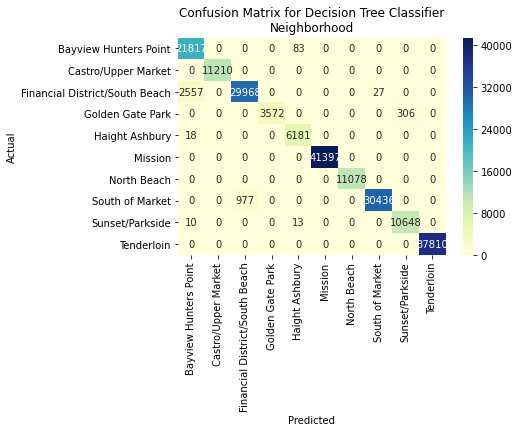

In [266]:
#Make a confusion matrix
confusion_matrix = pd.crosstab(conf_matrix_df['Actual'], conf_matrix_df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
ax = plt.axes()
ax.set_title('Confusion Matrix for Decision Tree Classifier\nNeighborhood')
#plt.figure(figsize = (15, 15))
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', cmap="YlGnBu")

In [53]:
#Find most important features for prediction
feat_import = tree.feature_importances_
feature_importances_df = pd.DataFrame(feat_import,
                                      index = nn_ps_train_features.columns,
                                      columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances_df

,Importance
Number of Pit Stops,0.536071
Police District,0.129365
Latitude,0.128165
"Areas of Vulnerability, 2016",0.127361
Current Police Districts,0.051680
Longitude,0.026817
Current Supervisor Districts,0.000417
Address,0.000120
Incident Description,0.000005
Incident Number,0.000000


Number of Pit Stops was the most important feature for prediction.

In [54]:
#Put neighborhood predictions into a dataframe to use for a plotly map
neighborhood_test_pred.shape
ps_neighborhood_test_pred_df = pd.DataFrame(neighborhood_test_pred, columns = ['Neighborhood Name'])
ps_neighborhood_test_pred_df['Neighborhood Name'].replace(ps_neighborhood_name_dict, inplace = True)
ps_neighborhood_test_pred_df

,Neighborhood Name
0,Sunset/Parkside
1,Tenderloin
2,Financial District/South Beach
3,Tenderloin
4,Bayview Hunters Point
...,...
208103,Golden Gate Park
208104,Tenderloin
208105,Mission
208106,Tenderloin


In [55]:
#Add a column with neighborhood predictions to Pit Stop Neighborhood original dataset to use in a plotly map
final_ps_neighborhood = nn_ps_test_features
final_ps_neighborhood = final_ps_neighborhood.reset_index()
final_ps_neighborhood.drop(['index'], axis = 1)
final_ps_neighborhood['Neighborhood Predictions'] = ps_neighborhood_test_pred_df['Neighborhood Name']
final_ps_neighborhood

,index,Address,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Date,Incident Day of Week,Incident Description,Incident Number,Incident Time,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Number of Pit Stops,Neighborhood Predictions
0,368951,1615,1.0,10.0,7.0,22,5115,6,587,170278022,563,2017,37.757460,-122.509074,9,8,39.0,0,1,Sunset/Parkside
1,368949,5276,2.0,5.0,10.0,22,5092,1,1122,170187928,1287,2017,37.783707,-122.408595,8,8,19.0,0,9,Tenderloin
2,368948,5058,1.0,6.0,3.0,22,5216,2,583,170556298,750,2017,37.798268,-122.399850,1,8,77.0,0,2,Financial District/South Beach
3,368947,7259,2.0,5.0,10.0,10,5142,5,836,170338513,713,2017,37.779585,-122.416770,4,0,21.0,1,9,Tenderloin
4,368920,671,2.0,2.0,9.0,33,5156,5,499,170379329,21,2017,37.736152,-122.384602,0,8,86.0,3,1,Bayview Hunters Point
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208103,1353344,9327,1.0,8.0,4.0,47,6182,2,1223,200121719,1080,2020,37.772179,-122.492761,7,2,8.0,3,2,Golden Gate Park
208104,1353345,9327,2.0,5.0,10.0,1,6173,4,82,200129161,912,2020,37.781177,-122.411700,10,10,20.0,0,9,Tenderloin
208105,1353354,9327,2.0,3.0,2.0,25,6123,6,687,200129365,0,2020,37.765051,-122.419669,3,10,53.0,2,5,Mission
208106,1353315,9327,2.0,5.0,10.0,29,6173,4,1282,200129092,615,2020,37.784449,-122.416072,10,10,20.0,0,9,Tenderloin


#### Predicting Incident Category

In [149]:
#Decision Tree model predicting Incident Category with dataset that includes all columns
tree = DecisionTreeClassifier()
tree.fit(ic_ps_train_features, ic_ps_train_label)

DecisionTreeClassifier()

In [150]:
#Print accuracy scores
incident_cat_train_pred = tree.predict(ic_ps_train_features)
incident_cat_train_actual = ic_ps_train_label

incident_cat_test_pred = tree.predict(ic_ps_test_features)
incident_cat_test_actual = ic_ps_test_label

print('Training set accuracy score:', accuracy_score(incident_cat_train_pred, incident_cat_train_actual))
print('Test set accuracy score:', accuracy_score(incident_cat_test_pred, incident_cat_test_actual))

Training set accuracy score: 1.0
Test set accuracy score: 0.6126434351394469


In [58]:
#Use Grid Search to find best parameters for prediction
param_grid = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'min_samples_split': [1, 2, 3, 4, 5],
             'min_samples_leaf': [1, 2, 3, 4, 5]}
incident_cat_gs = GridSearchCV(estimator = tree, n_jobs = 8, param_grid = param_grid)
incident_cat_gs.fit(ic_ps_test_features, ic_ps_test_label)

C:\Users\sdelp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [59]:
#Print out best parameters
incident_cat_gs.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [152]:
#Train a Decision Tree Classifier with the best parameters
tree = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 2, min_samples_split = 2, 
                              splitter = 'best')
tree.fit(ic_ps_train_features, ic_ps_train_label)

DecisionTreeClassifier(min_samples_leaf=2)

In [153]:
#Print accuracy scores
incident_cat_train_pred = tree.predict(ic_ps_train_features)
incident_cat_train_actual = ic_ps_train_label

incident_cat_test_pred = tree.predict(ic_ps_test_features)
incident_cat_test_actual = ic_ps_test_label

print('Training set accuracy score:', accuracy_score(incident_cat_train_pred, incident_cat_train_actual))
print('Test set accuracy score:', accuracy_score(incident_cat_test_pred, incident_cat_test_actual))

Training set accuracy score: 0.9999439391852282
Test set accuracy score: 0.613388240721164


Even with the best parameters as determined by Grid Search, the accuracy score did not improve.

In [154]:
#Put incident category predictions into a dataframe and replace encoded labels with actual labels
incident_cat_test_pred
incident_cat_test_pred.shape
incident_cat_test_pred_df = pd.DataFrame(incident_cat_test_pred, columns = ['Predictions'])
incident_cat_test_pred_df['Predictions'].replace(ps_incident_category_dict, inplace = True)
incident_cat_test_pred_df

,Predictions
0,LARCENY/THEFT
1,LARCENY/THEFT
2,LARCENY/THEFT
3,DRUG/NARCOTIC
4,OTHER OFFENSES
...,...
208103,NON-CRIMINAL
208104,ASSAULT
208105,MISSING PERSON
208106,MOTOR VEHICLE THEFT


In [155]:
#Put actual incident categories into a dataframe and replace encoded labels with actual labels
incident_cat_test_actual_df = pd.DataFrame(incident_cat_test_actual, columns = ['Incident Category'])
incident_cat_test_actual_df['Incident Category'].replace(ps_incident_category_dict, inplace = True)
incident_cat_test_actual_df = incident_cat_test_actual_df.reset_index()
incident_cat_test_actual_df.drop(['index'], axis = 1)

,Incident Category
0,LARCENY/THEFT
1,LARCENY/THEFT
2,LARCENY/THEFT
3,DRUG/NARCOTIC
4,OTHER OFFENSES
...,...
208103,TRAFFIC COLLISION
208104,ASSAULT
208105,LOST PROPERTY
208106,MOTOR VEHICLE THEFT


In [156]:
#Make a dataframe with the actual and predicted incident categories
conf_matrix_df = pd.DataFrame(columns = ['Actual', 'Predicted'])
conf_matrix_df['Actual'] = incident_cat_test_actual_df['Incident Category']
conf_matrix_df['Predicted'] = incident_cat_test_pred_df['Predictions']
conf_matrix_df

,Actual,Predicted
0,LARCENY/THEFT,LARCENY/THEFT
1,LARCENY/THEFT,LARCENY/THEFT
2,LARCENY/THEFT,LARCENY/THEFT
3,DRUG/NARCOTIC,DRUG/NARCOTIC
4,OTHER OFFENSES,OTHER OFFENSES
...,...,...
208103,TRAFFIC COLLISION,NON-CRIMINAL
208104,ASSAULT,ASSAULT
208105,LOST PROPERTY,MISSING PERSON
208106,MOTOR VEHICLE THEFT,MOTOR VEHICLE THEFT


In [157]:
conf_matrix_df['Actual'].nunique()

47

<AxesSubplot:title={'center':'Confusion Matrix for Decision Tree Classifier\nIncident Categories'}, xlabel='Predicted', ylabel='Actual'>

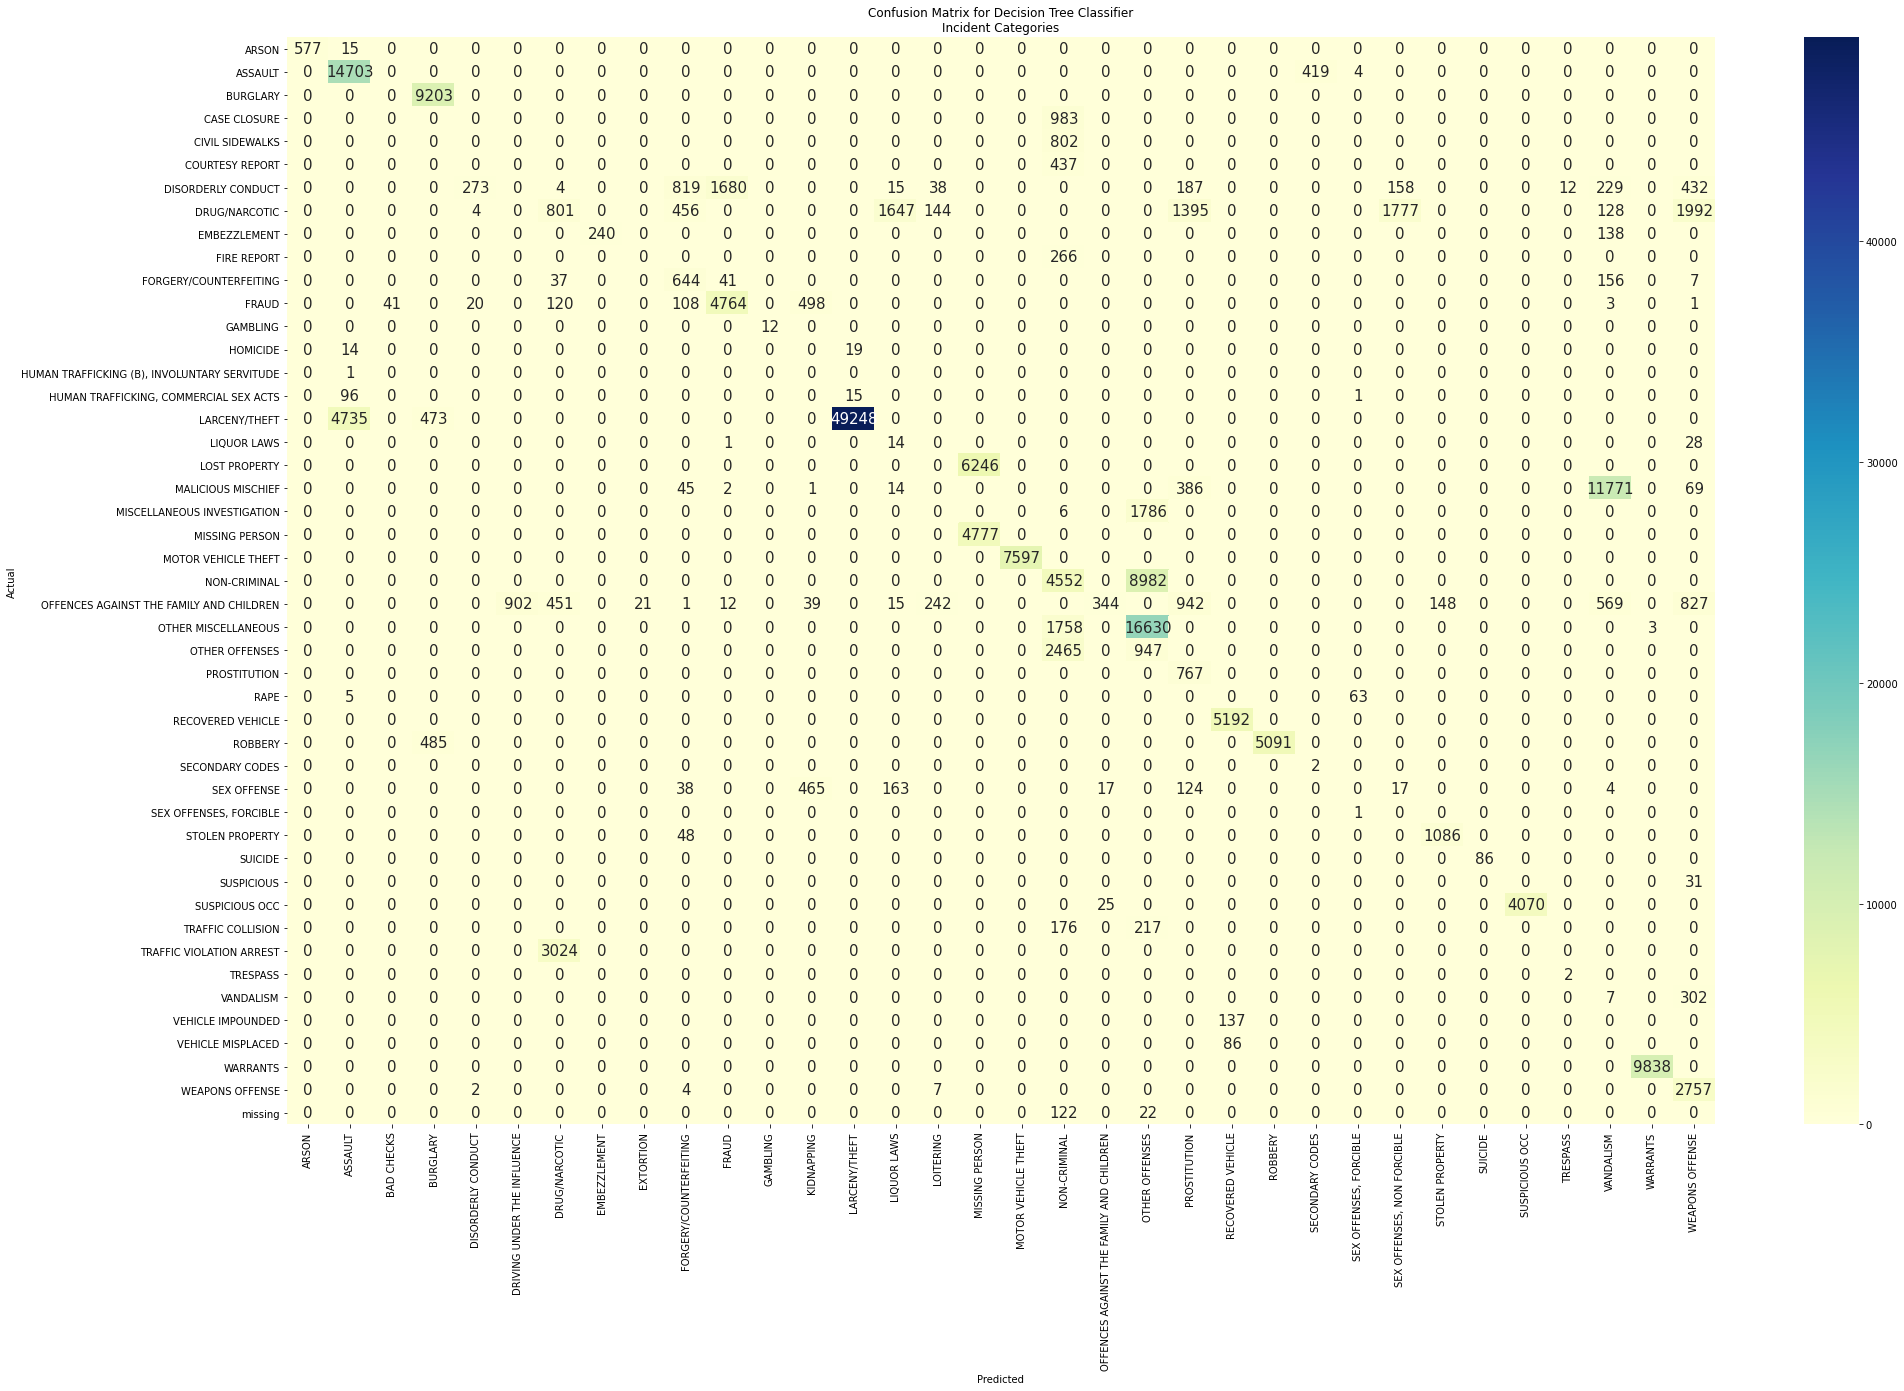

In [186]:
#Make a confusion matrix
confusion_matrix = pd.crosstab(conf_matrix_df['Actual'], conf_matrix_df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (32, 20))
ax = plt.axes()
ax.set_title('Confusion Matrix for Decision Tree Classifier\nIncident Categories')
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 15}, fmt='g', cmap="YlGnBu")

In [187]:
#Find most important features for prediction
feat_import = tree.feature_importances_
feature_importances_df = pd.DataFrame(feat_import,
                                      index = ic_ps_train_features.columns,
                                      columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances_df

,Importance
Incident Description,0.702459
Incident Severity Category,0.232363
Resolution,0.064442
Incident Number,0.000344
Incident Year,0.000273
Incident Date,0.000064
Latitude,0.000020
Address,0.000011
Incident Time,0.000009
Longitude,0.000007


The most important feature for prediction was Incident Description.

In [66]:
#Put incident category predictions into a dataframe and join it with Pit Stop neighborhood original dataset
final_ps_incident_cat = ic_ps_test_features
final_ps_incident_cat = final_ps_incident_cat.reset_index()
final_ps_incident_cat.drop(['index'], axis = 1)
final_ps_incident_cat['Incident Category Predictions'] = incident_cat_test_pred_df['Predictions']
final_ps_incident_cat

,index,Address,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Date,Incident Day of Week,Incident Description,Incident Number,Incident Time,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Neighborhood Name,Number of Pit Stops,Incident Category Predictions
0,368951,1615,1.0,10.0,7.0,5115,6,587,170278022,563,2017,37.757460,-122.509074,9,8,39.0,0,8,1,LARCENY/THEFT
1,368949,5276,2.0,5.0,10.0,5092,1,1122,170187928,1287,2017,37.783707,-122.408595,8,8,19.0,0,9,9,LARCENY/THEFT
2,368948,5058,1.0,6.0,3.0,5216,2,583,170556298,750,2017,37.798268,-122.399850,1,8,77.0,0,2,2,LARCENY/THEFT
3,368947,7259,2.0,5.0,10.0,5142,5,836,170338513,713,2017,37.779585,-122.416770,4,0,21.0,1,9,9,DRUG/NARCOTIC
4,368920,671,2.0,2.0,9.0,5156,5,499,170379329,21,2017,37.736152,-122.384602,0,8,86.0,3,0,1,OTHER OFFENSES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208103,1353344,9327,1.0,8.0,4.0,6182,2,1223,200121719,1080,2020,37.772179,-122.492761,7,2,8.0,3,3,2,NON-CRIMINAL
208104,1353345,9327,2.0,5.0,10.0,6173,4,82,200129161,912,2020,37.781177,-122.411700,10,10,20.0,0,9,9,ASSAULT
208105,1353354,9327,2.0,3.0,2.0,6123,6,687,200129365,0,2020,37.765051,-122.419669,3,10,53.0,2,5,5,MISSING PERSON
208106,1353315,9327,2.0,5.0,10.0,6173,4,1282,200129092,615,2020,37.784449,-122.416072,10,10,20.0,0,9,9,MOTOR VEHICLE THEFT


In [67]:
#Make a new dataframe that only includes index and Incident Category Predictions columns
new_final_ps_incident_cat = pd.DataFrame(final_ps_incident_cat, columns = ['index', 'Neighborhood Name', 
                                                                           'Incident Category Predictions'])
new_final_ps_incident_cat

,index,Neighborhood Name,Incident Category Predictions
0,368951,8,LARCENY/THEFT
1,368949,9,LARCENY/THEFT
2,368948,2,LARCENY/THEFT
3,368947,9,DRUG/NARCOTIC
4,368920,0,OTHER OFFENSES
...,...,...,...
208103,1353344,3,NON-CRIMINAL
208104,1353345,9,ASSAULT
208105,1353354,5,MISSING PERSON
208106,1353315,9,MOTOR VEHICLE THEFT


In [68]:
#Merge final neighborhoods and final incident categories datasets
ps_final_df = final_ps_neighborhood.merge(new_final_ps_incident_cat, on = "index")

In [69]:
ps_final_df.columns

Index(['index', 'Address', 'Areas of Vulnerability, 2016',
       'Current Police Districts', 'Current Supervisor Districts',
       'Incident Category', 'Incident Date', 'Incident Day of Week',
       'Incident Description', 'Incident Number', 'Incident Time',
       'Incident Year', 'Latitude', 'Longitude', 'Police District',
       'Resolution', 'SF Find Neighborhoods', 'Incident Severity Category',
       'Number of Pit Stops', 'Neighborhood Predictions', 'Neighborhood Name',
       'Incident Category Predictions'],
      dtype='object')

In [71]:
#Change encoded labels in Neighborhood Name and Incident Category columns back to original labels
ps_final_df['Neighborhood Name'].replace(ps_neighborhood_name_dict, inplace = True)
ps_final_df['Incident Category'].replace(ps_incident_category_dict, inplace = True)

In [72]:
ps_final_df

,index,Address,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Date,Incident Day of Week,Incident Description,Incident Number,...,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Number of Pit Stops,Neighborhood Predictions,Neighborhood Name,Incident Category Predictions
0,368951,1615,1.0,10.0,7.0,LARCENY/THEFT,5115,6,587,170278022,...,37.757460,-122.509074,9,8,39.0,0,1,Sunset/Parkside,Sunset/Parkside,LARCENY/THEFT
1,368949,5276,2.0,5.0,10.0,LARCENY/THEFT,5092,1,1122,170187928,...,37.783707,-122.408595,8,8,19.0,0,9,Tenderloin,Tenderloin,LARCENY/THEFT
2,368948,5058,1.0,6.0,3.0,LARCENY/THEFT,5216,2,583,170556298,...,37.798268,-122.399850,1,8,77.0,0,2,Financial District/South Beach,Financial District/South Beach,LARCENY/THEFT
3,368947,7259,2.0,5.0,10.0,DRUG/NARCOTIC,5142,5,836,170338513,...,37.779585,-122.416770,4,0,21.0,1,9,Tenderloin,Tenderloin,DRUG/NARCOTIC
4,368920,671,2.0,2.0,9.0,OTHER OFFENSES,5156,5,499,170379329,...,37.736152,-122.384602,0,8,86.0,3,1,Bayview Hunters Point,Bayview Hunters Point,OTHER OFFENSES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208103,1353344,9327,1.0,8.0,4.0,TRAFFIC COLLISION,6182,2,1223,200121719,...,37.772179,-122.492761,7,2,8.0,3,2,Golden Gate Park,Golden Gate Park,NON-CRIMINAL
208104,1353345,9327,2.0,5.0,10.0,ASSAULT,6173,4,82,200129161,...,37.781177,-122.411700,10,10,20.0,0,9,Tenderloin,Tenderloin,ASSAULT
208105,1353354,9327,2.0,3.0,2.0,LOST PROPERTY,6123,6,687,200129365,...,37.765051,-122.419669,3,10,53.0,2,5,Mission,Mission,MISSING PERSON
208106,1353315,9327,2.0,5.0,10.0,MOTOR VEHICLE THEFT,6173,4,1282,200129092,...,37.784449,-122.416072,10,10,20.0,0,9,Tenderloin,Tenderloin,MOTOR VEHICLE THEFT


I put the scatter mapbox into markdown because it was taking up a lot of room. 

#Plot a scatter mapbox of Neighborhood and Incident Category Predictions
#hover data shows the predictions and actual values for both neighborhoods and incident categories
test_fig = px.scatter_mapbox(ps_final_df,
                            lat = 'Latitude', 
                            lon = 'Longitude', 
                            hover_data = ['Neighborhood Predictions', 'Neighborhood Name',
                                          'Incident Category Predictions', 'Incident Category'],
                            mapbox_style = 'open-street-map',
                            color = 'Neighborhood Predictions',
                            zoom = 10.5,)
test_fig.update_layout(title = 'Neighborhood and Incident Category Predictions for Pit Stop Neighborhoods')
test_fig.show()

In [80]:
#Save plotly map as an html file
pio.write_html(test_fig, file=r'C:\Users\sdelp\Documents\Becky\Predictions_for_Pit_Stop_Neighborhoods.html', auto_open=True)

### Non-Pit Stop Neighborhood sub-dataset

#### Predicting Incident Severity Category

In [200]:
#Decision Tree model
tree = DecisionTreeClassifier()
tree.fit(nonps_train_df.drop('Incident Severity Category', axis=1), nonps_train_df['Incident Severity Category'])

DecisionTreeClassifier()

In [201]:
#Print accuracy scores
print('Training set accuracy score:', accuracy_score(tree.predict(nonps_train_df.drop('Incident Severity Category',axis=1)),
                                                     nonps_train_df['Incident Severity Category']))
print('Test set accuracy score:', accuracy_score(tree.predict(nonps_test_df.drop('Incident Severity Category',axis=1)),
                                                 nonps_test_df['Incident Severity Category']))

Training set accuracy score: 1.0
Test set accuracy score: 0.9976693229871743


In [202]:
#Find most important features for prediction
mat=tree.decision_path(nonps_test_df.iloc[4].drop('Incident Severity Category').values.reshape(1,-1))
print(nonps_test_df.iloc[4].drop('Incident Severity Category'))
print(mat)

Address                         1.469600e+04
Areas of Vulnerability, 2016    0.000000e+00
Current Police Districts        4.000000e+00
Current Supervisor Districts    1.100000e+01
Incident Category               2.900000e+01
Incident Date                   5.597000e+03
Incident Day of Week            5.000000e+00
Incident Description            2.700000e+01
Incident Number                 1.805916e+08
Incident Time                   1.325000e+03
Incident Year                   2.018000e+03
Latitude                        3.777786e+01
Longitude                      -1.224265e+02
Police District                 4.000000e+00
Resolution                      1.000000e+01
SF Find Neighborhoods           2.200000e+01
Neighborhood Name               4.000000e+00
Number of Pit Stops             0.000000e+00
Name: 1134659, dtype: float64
  (0, 0)	1
  (0, 74)	1
  (0, 75)	1
  (0, 91)	1
  (0, 92)	1
  (0, 93)	1
  (0, 94)	1


The most important features for prediction were Incident Number and Address.

#### Predicting Neighborhood Name

In [81]:
#Decision Tree model
tree = DecisionTreeClassifier()
tree.fit(nn_nonps_train_features, nn_nonps_train_label)

DecisionTreeClassifier()

In [82]:
#Print accuracy scores
nonps_neighborhood_train_pred = tree.predict(nn_nonps_train_features)
nonps_neighborhood_train_actual = nn_nonps_train_label

nonps_neighborhood_test_pred = tree.predict(nn_nonps_test_features)
nonps_neighborhood_test_actual = nn_nonps_test_label

print('Training set accuracy score:', accuracy_score(nonps_neighborhood_train_pred, nonps_neighborhood_train_actual))
print('Test set accuracy score:', accuracy_score(nonps_neighborhood_test_pred, nonps_neighborhood_test_actual))

Training set accuracy score: 1.0
Test set accuracy score: 0.9732041924273931


In [83]:
#Put neighborhood predictions into a dataframe and replace encoded labels with original labels
nonps_neighborhood_test_pred
nonps_neighborhood_test_pred.shape
nonps_neighborhood_test_pred_df = pd.DataFrame(nonps_neighborhood_test_pred, columns = ['Predictions'])
nonps_neighborhood_test_pred_df['Predictions'].replace(nonps_neighborhood_name_dict, inplace = True)
nonps_neighborhood_test_pred_df

,Predictions
0,Western Addition
1,Russian Hill
2,Mission Bay
3,Inner Richmond
4,Hayes Valley
...,...
143301,Bernal Heights
143302,Twin Peaks
143303,Twin Peaks
143304,Hayes Valley


In [84]:
#Put actual neighborhoods into a dataframe and replace encoded labels with original labels
nonps_neighborhood_test_actual
nonps_neighborhood_test_actual_df = pd.DataFrame(nonps_neighborhood_test_actual, columns = ['Neighborhood Name'])
nonps_neighborhood_test_actual_df['Neighborhood Name'].replace(nonps_neighborhood_name_dict, inplace = True)
nonps_neighborhood_test_actual_df = nonps_neighborhood_test_actual_df.reset_index()
nonps_neighborhood_test_actual_df.drop(['index'], axis = 1)

,Neighborhood Name
0,Western Addition
1,Russian Hill
2,Mission Bay
3,Inner Richmond
4,Hayes Valley
...,...
143301,Bernal Heights
143302,Twin Peaks
143303,Twin Peaks
143304,Hayes Valley


In [85]:
#Make a new dataframe that includes the Actual and Predicted neighborhoods
conf_matrix_df = pd.DataFrame(columns = ['Actual', 'Predicted'])
conf_matrix_df['Actual'] = nonps_neighborhood_test_actual_df['Neighborhood Name']
conf_matrix_df['Predicted'] = nonps_neighborhood_test_pred_df['Predictions']
conf_matrix_df

,Actual,Predicted
0,Western Addition,Western Addition
1,Russian Hill,Russian Hill
2,Mission Bay,Mission Bay
3,Inner Richmond,Inner Richmond
4,Hayes Valley,Hayes Valley
...,...,...
143301,Bernal Heights,Bernal Heights
143302,Twin Peaks,Twin Peaks
143303,Twin Peaks,Twin Peaks
143304,Hayes Valley,Hayes Valley


<AxesSubplot:title={'center':'Confusion Matrix for Decision Tree Classifier\nNeighborhoods'}, xlabel='Predicted', ylabel='Actual'>

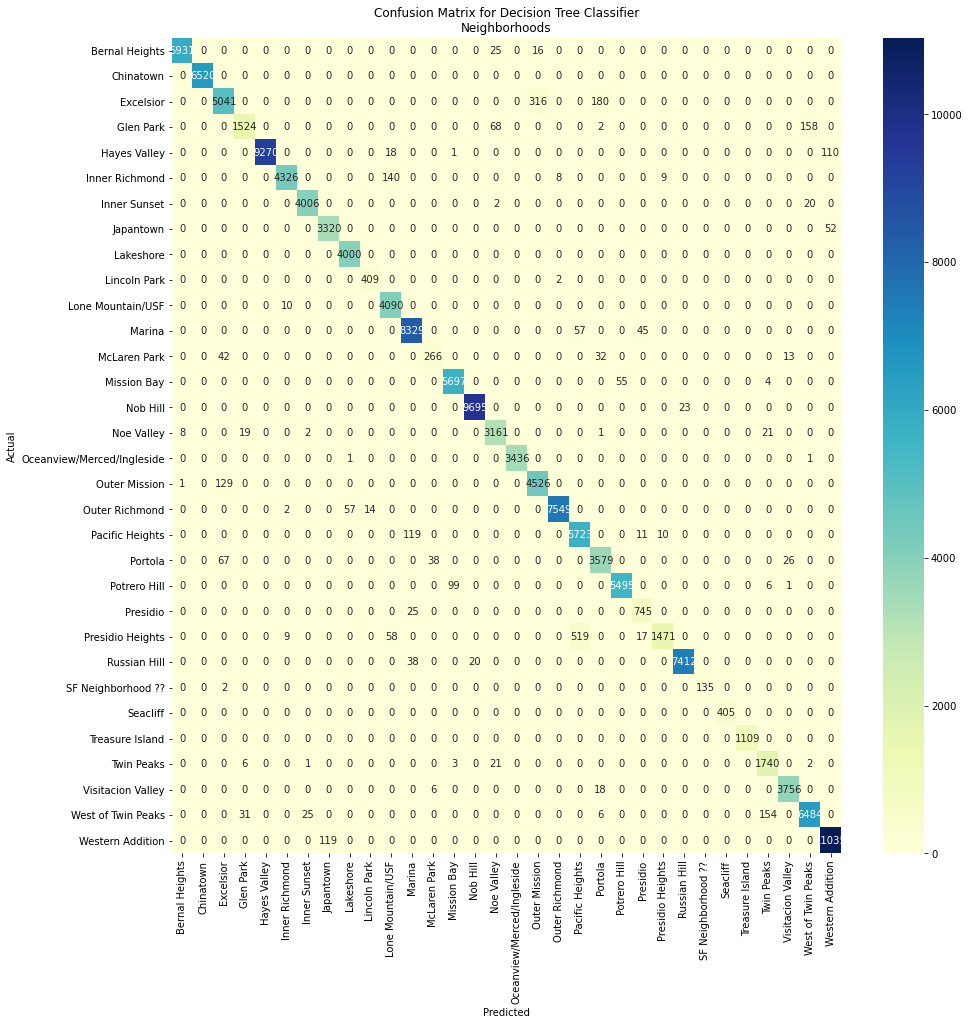

In [208]:
#Make a confusion matrix
confusion_matrix = pd.crosstab(conf_matrix_df['Actual'], conf_matrix_df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (15, 15))
ax = plt.axes()
ax.set_title('Confusion Matrix for Decision Tree Classifier\nNeighborhoods')
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', cmap="YlGnBu")

In [86]:
#Find most important features for prediction
feat_import = tree.feature_importances_
feature_importances_df = pd.DataFrame(feat_import,
                                      index = nn_nonps_train_features.columns,
                                      columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances_df

,Importance
Latitude,0.290987
Longitude,0.209489
Current Supervisor Districts,0.158806
SF Find Neighborhoods,0.118392
"Areas of Vulnerability, 2016",0.116420
Current Police Districts,0.056171
Police District,0.042273
Address,0.006423
Incident Date,0.000418
Incident Number,0.000209


The most important feature for prediction was Latitude. 

In [87]:
#Put neighborhood predictions into a dataframe to use for a plotly map
nonps_neighborhood_test_pred.shape
nonps_neighborhood_test_pred_df = pd.DataFrame(nonps_neighborhood_test_pred, columns = ['Neighborhood Name'])
nonps_neighborhood_test_pred_df['Neighborhood Name'].replace(nonps_neighborhood_name_dict, inplace = True)
nonps_neighborhood_test_pred_df

,Neighborhood Name
0,Western Addition
1,Russian Hill
2,Mission Bay
3,Inner Richmond
4,Hayes Valley
...,...
143301,Bernal Heights
143302,Twin Peaks
143303,Twin Peaks
143304,Hayes Valley


In [88]:
#Add a column with neighborhood predictions to non-Pit Stop Neighborhood original dataset to use in a plotly map
final_nonps_neighborhood = nn_nonps_test_features
final_nonps_neighborhood = final_nonps_neighborhood.reset_index()
final_nonps_neighborhood.drop(['index'], axis = 1)
final_nonps_neighborhood['Neighborhood Predictions'] = nonps_neighborhood_test_pred_df['Neighborhood Name']
final_nonps_neighborhood

,index,Address,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Date,Incident Day of Week,Incident Description,Incident Number,Incident Time,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Number of Pit Stops,Neighborhood Predictions
0,1134647,14696,1,4.0,11.0,42,5591,6,711,180590913,1020,2018,37.783293,-122.432706,4,10,97.0,1,0,Western Addition
1,1134649,14696,0,6.0,6.0,21,5597,5,1091,180591466,1050,2018,37.804790,-122.420178,1,10,107.0,0,0,Russian Hill
2,1134652,14696,0,1.0,10.0,1,5597,5,76,180591121,1120,2018,37.773573,-122.399433,8,10,32.0,0,0,Mission Bay
3,1134658,14696,0,8.0,4.0,21,5596,1,1091,180590399,1020,2018,37.774031,-122.460553,7,10,5.0,0,0,Inner Richmond
4,1134659,14696,0,4.0,11.0,29,5597,5,27,180591604,1325,2018,37.777862,-122.426548,4,10,22.0,3,0,Hayes Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143301,1354782,14696,0,9.0,2.0,4,6163,1,216,200138504,210,2020,37.746881,-122.411610,2,10,83.0,0,0,Bernal Heights
143302,1354783,14696,0,7.0,5.0,21,6163,1,1091,200138883,660,2020,37.752352,-122.445984,6,10,51.0,0,0,Twin Peaks
143303,1354785,14696,0,7.0,8.0,32,6159,4,354,200138695,780,2020,37.746106,-122.454664,6,10,49.0,3,0,Twin Peaks
143304,1354768,14696,0,4.0,11.0,1,6163,1,166,200138435,540,2020,37.777178,-122.428101,4,10,22.0,0,0,Hayes Valley


#### Predicting Incident Category

In [158]:
#Decision Tree model
tree = DecisionTreeClassifier()
tree.fit(ic_nonps_train_features, ic_nonps_train_label)

DecisionTreeClassifier()

In [159]:
#Print accuracy scores
nonps_incident_category_train_pred = tree.predict(ic_nonps_train_features)
nonps_incident_category_train_actual = ic_nonps_train_label

nonps_incident_category_test_pred = tree.predict(ic_nonps_test_features)
nonps_incident_category_test_actual = ic_nonps_test_label

print('Training set accuracy score:', accuracy_score(nonps_incident_category_train_pred, nonps_incident_category_train_actual))
print('Test set accuracy score:', accuracy_score(nonps_incident_category_test_pred, nonps_incident_category_test_actual))

Training set accuracy score: 1.0
Test set accuracy score: 0.9580059453198052


In [160]:
#Put incident category predictions into a dataframe and replace encoded labels with actual labels
nonps_incident_category_test_pred
nonps_incident_category_test_pred.shape
nonps_incident_category_test_pred_df = pd.DataFrame(nonps_incident_category_test_pred, columns = ['Predictions'])
nonps_incident_category_test_pred_df['Predictions'].replace(nonps_incident_category_dict, inplace = True)
nonps_incident_category_test_pred_df

,Predictions
0,STOLEN PROPERTY
1,LARCENY/THEFT
2,ASSAULT
3,LARCENY/THEFT
4,NON-CRIMINAL
...,...
143301,BURGLARY
143302,LARCENY/THEFT
143303,OTHER OFFENSES
143304,ASSAULT


In [161]:
#Put actual incident categories into a dataframe and replace encoded labels with actual labels
nonps_incident_category_test_actual
nonps_incident_category_test_actual_df = pd.DataFrame(nonps_incident_category_test_actual, columns = ['Incident Category'])
nonps_incident_category_test_actual_df['Incident Category'].replace(nonps_incident_category_dict, inplace = True)
nonps_incident_category_test_actual_df = nonps_incident_category_test_actual_df.reset_index()
nonps_incident_category_test_actual_df.drop(['index'], axis = 1)

,Incident Category
0,STOLEN PROPERTY
1,LARCENY/THEFT
2,ASSAULT
3,LARCENY/THEFT
4,NON-CRIMINAL
...,...
143301,BURGLARY
143302,LARCENY/THEFT
143303,OTHER OFFENSES
143304,ASSAULT


In [162]:
#Make a new dataframe that includes the Actual and Predicted incident categories
conf_matrix_df = pd.DataFrame(columns = ['Actual', 'Predicted'])
conf_matrix_df['Actual'] = nonps_incident_category_test_actual_df['Incident Category']
conf_matrix_df['Predicted'] = nonps_incident_category_test_pred_df['Predictions']
conf_matrix_df

,Actual,Predicted
0,STOLEN PROPERTY,STOLEN PROPERTY
1,LARCENY/THEFT,LARCENY/THEFT
2,ASSAULT,ASSAULT
3,LARCENY/THEFT,LARCENY/THEFT
4,NON-CRIMINAL,NON-CRIMINAL
...,...,...
143301,BURGLARY,BURGLARY
143302,LARCENY/THEFT,LARCENY/THEFT
143303,OTHER OFFENSES,OTHER OFFENSES
143304,ASSAULT,ASSAULT


<AxesSubplot:title={'center':'Confusion Matrix for Decision Tree Classifier\nIncident Categories'}, xlabel='Predicted', ylabel='Actual'>

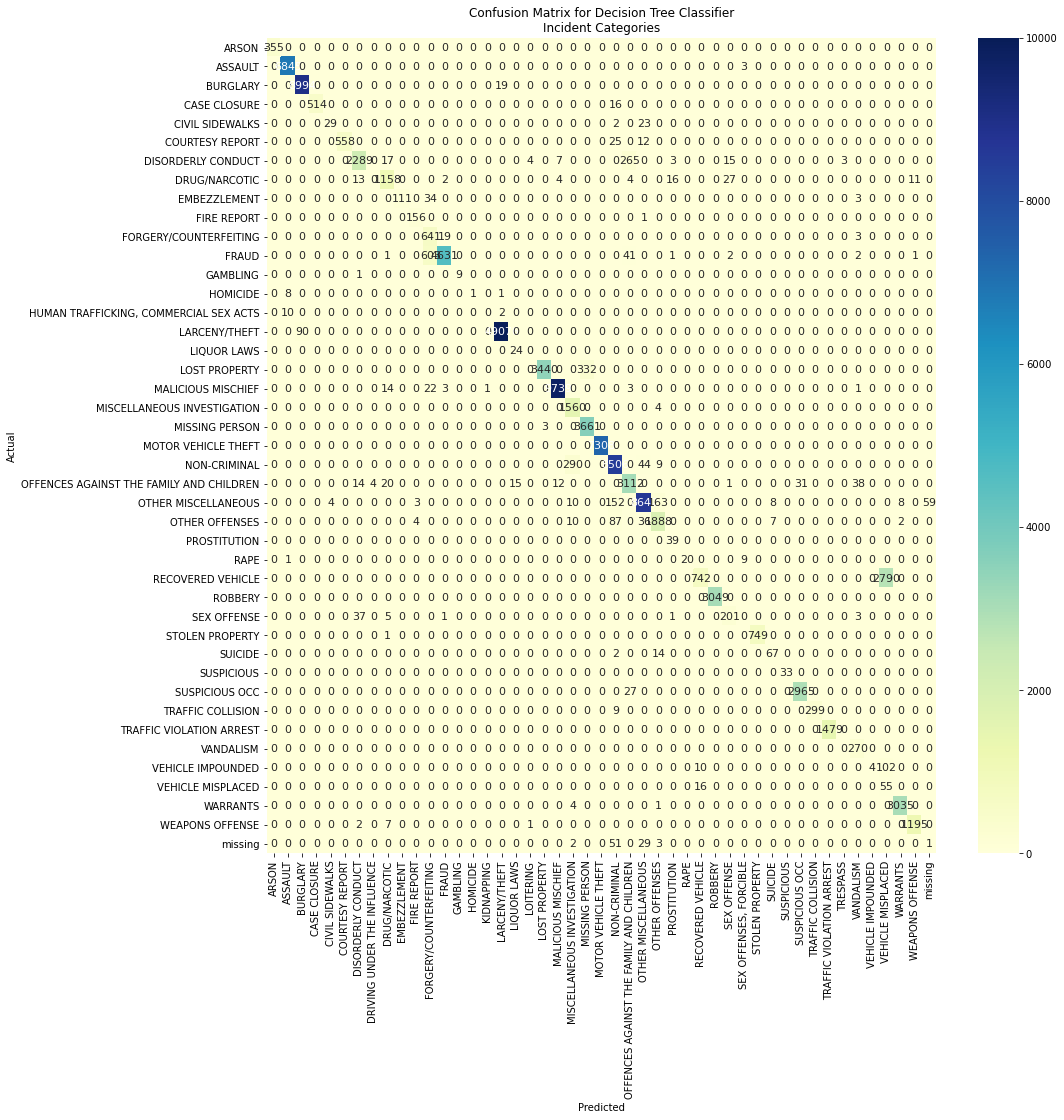

In [217]:
#Make a confusion matrix
confusion_matrix = pd.crosstab(conf_matrix_df['Actual'], conf_matrix_df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (15, 15))
ax = plt.axes()
ax.set_title('Confusion Matrix for Decision Tree Classifier\nIncident Categories')
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 11}, fmt='g', cmap="YlGnBu", vmin = 0, vmax = 10000)

In [163]:
conf_matrix_df['Actual'].nunique()

43

In [94]:
#Find most important features for prediction
feat_import = tree.feature_importances_
feature_importances_df = pd.DataFrame(feat_import,
                                      index = ic_nonps_train_features.columns,
                                      columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances_df

,Importance
Incident Description,0.724216
Incident Severity Category,0.220881
Resolution,0.048145
Incident Number,0.002871
Incident Date,0.001576
Address,0.001534
Incident Year,0.000520
SF Find Neighborhoods,0.000062
Incident Time,0.000039
Latitude,0.000036


The most important feature for prediction was Incident Description.

In [95]:
#Put incident category predictions into a dataframe and join it with non-Pit Stop neighborhood original dataset
final_nonps_incident_cat = ic_nonps_test_features
final_nonps_incident_cat = final_nonps_incident_cat.reset_index()
final_nonps_incident_cat.drop(['index'], axis = 1)
final_nonps_incident_cat['Incident Category Predictions'] = nonps_incident_category_test_pred_df['Predictions']
final_nonps_incident_cat

,index,Address,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Date,Incident Day of Week,Incident Description,Incident Number,Incident Time,Incident Year,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Neighborhood Name,Number of Pit Stops,Incident Category Predictions
0,1134647,14696,1,4.0,11.0,5591,6,711,180590913,1020,2018,37.783293,-122.432706,4,10,97.0,1,31,0,STOLEN PROPERTY
1,1134649,14696,0,6.0,6.0,5597,5,1091,180591466,1050,2018,37.804790,-122.420178,1,10,107.0,0,24,0,LARCENY/THEFT
2,1134652,14696,0,1.0,10.0,5597,5,76,180591121,1120,2018,37.773573,-122.399433,8,10,32.0,0,13,0,ASSAULT
3,1134658,14696,0,8.0,4.0,5596,1,1091,180590399,1020,2018,37.774031,-122.460553,7,10,5.0,0,5,0,LARCENY/THEFT
4,1134659,14696,0,4.0,11.0,5597,5,27,180591604,1325,2018,37.777862,-122.426548,4,10,22.0,3,4,0,NON-CRIMINAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143301,1354782,14696,0,9.0,2.0,6163,1,216,200138504,210,2020,37.746881,-122.411610,2,10,83.0,0,0,0,BURGLARY
143302,1354783,14696,0,7.0,5.0,6163,1,1091,200138883,660,2020,37.752352,-122.445984,6,10,51.0,0,28,0,LARCENY/THEFT
143303,1354785,14696,0,7.0,8.0,6159,4,354,200138695,780,2020,37.746106,-122.454664,6,10,49.0,3,28,0,OTHER OFFENSES
143304,1354768,14696,0,4.0,11.0,6163,1,166,200138435,540,2020,37.777178,-122.428101,4,10,22.0,0,4,0,ASSAULT


In [96]:
#Make a new dataframe that only includes index and Incident Category Predictions columns
new_final_nonps_incident_cat = pd.DataFrame(final_nonps_incident_cat, columns = ['index', 'Neighborhood Name',
                                                                                 'Incident Category Predictions'])
new_final_nonps_incident_cat

,index,Neighborhood Name,Incident Category Predictions
0,1134647,31,STOLEN PROPERTY
1,1134649,24,LARCENY/THEFT
2,1134652,13,ASSAULT
3,1134658,5,LARCENY/THEFT
4,1134659,4,NON-CRIMINAL
...,...,...,...
143301,1354782,0,BURGLARY
143302,1354783,28,LARCENY/THEFT
143303,1354785,28,OTHER OFFENSES
143304,1354768,4,ASSAULT


In [97]:
#Merge final neighborhoods and final incident categories datasets
nonps_final_df = final_nonps_neighborhood.merge(new_final_nonps_incident_cat, on = "index")

In [98]:
#Change encoded labels in Neighborhood Name and Incident Category columns back to original labels
nonps_final_df['Neighborhood Name'].replace(nonps_neighborhood_name_dict, inplace = True)
nonps_final_df['Incident Category'].replace(nonps_incident_category_dict, inplace = True)

In [99]:
nonps_final_df

,index,Address,"Areas of Vulnerability, 2016",Current Police Districts,Current Supervisor Districts,Incident Category,Incident Date,Incident Day of Week,Incident Description,Incident Number,...,Latitude,Longitude,Police District,Resolution,SF Find Neighborhoods,Incident Severity Category,Number of Pit Stops,Neighborhood Predictions,Neighborhood Name,Incident Category Predictions
0,1134647,14696,1,4.0,11.0,STOLEN PROPERTY,5591,6,711,180590913,...,37.783293,-122.432706,4,10,97.0,1,0,Western Addition,Western Addition,STOLEN PROPERTY
1,1134649,14696,0,6.0,6.0,LARCENY/THEFT,5597,5,1091,180591466,...,37.804790,-122.420178,1,10,107.0,0,0,Russian Hill,Russian Hill,LARCENY/THEFT
2,1134652,14696,0,1.0,10.0,ASSAULT,5597,5,76,180591121,...,37.773573,-122.399433,8,10,32.0,0,0,Mission Bay,Mission Bay,ASSAULT
3,1134658,14696,0,8.0,4.0,LARCENY/THEFT,5596,1,1091,180590399,...,37.774031,-122.460553,7,10,5.0,0,0,Inner Richmond,Inner Richmond,LARCENY/THEFT
4,1134659,14696,0,4.0,11.0,NON-CRIMINAL,5597,5,27,180591604,...,37.777862,-122.426548,4,10,22.0,3,0,Hayes Valley,Hayes Valley,NON-CRIMINAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143301,1354782,14696,0,9.0,2.0,BURGLARY,6163,1,216,200138504,...,37.746881,-122.411610,2,10,83.0,0,0,Bernal Heights,Bernal Heights,BURGLARY
143302,1354783,14696,0,7.0,5.0,LARCENY/THEFT,6163,1,1091,200138883,...,37.752352,-122.445984,6,10,51.0,0,0,Twin Peaks,Twin Peaks,LARCENY/THEFT
143303,1354785,14696,0,7.0,8.0,OTHER OFFENSES,6159,4,354,200138695,...,37.746106,-122.454664,6,10,49.0,3,0,Twin Peaks,Twin Peaks,OTHER OFFENSES
143304,1354768,14696,0,4.0,11.0,ASSAULT,6163,1,166,200138435,...,37.777178,-122.428101,4,10,22.0,0,0,Hayes Valley,Hayes Valley,ASSAULT


I put the scatter mapbox into markdown because running it was taking up a lot of room in the notebook. 

#Plot a scatter mapbox of the Neighborhood and Incident Category predictions
#hover data shows predictions and actual values for both neighborhoods and incident categories
test_fig = px.scatter_mapbox(nonps_final_df,
                            lat = 'Latitude', 
                            lon = 'Longitude', 
                            hover_data = ['Neighborhood Predictions', 'Neighborhood Name',
                                          'Incident Category Predictions', 'Incident Category'],
                            mapbox_style = 'open-street-map',
                            color = 'Neighborhood Predictions',
                            zoom = 10.5,)
test_fig.update_layout(title = 'Neighborhood and Incident Category Predictions for Non-Pit Stop Neighborhoods')
test_fig.show()

In [101]:
#Save plotly map as an html file
pio.write_html(test_fig, file=r'C:\Users\sdelp\Documents\Becky\Predictions_for_Non_Pit_Stop_Neighborhoods.html', auto_open=True)

Moving forward, I won't be trying to predict Incident Severity Category because the model seems to be doing fine predicting Incident Category (at least on the Non-Pit Stop Neighborhood sub-dataset). Incident Severity Category was a simpler classification problem in case the model was struggling with predicting Incident Category. 

# Random Forest

## Pit Stop Neighborhood Sub-Dataset

#### Predicting Neighborhood Name

In [225]:
#10 trees
rf = RandomForestClassifier(n_estimators= 10, oob_score = True)
rf.fit(nn_ps_train_features, nn_ps_train_label)
neighborhood_test_pred = rf.predict(nn_ps_test_features)
neighborhood_test_actual = nn_ps_test_label

neighborhood_train_pred = rf.predict(nn_ps_train_features)
neighborhood_train_actual = nn_ps_train_label

#Print accuracy score
rf.oob_score_
print('Training set accuracy score:', accuracy_score(neighborhood_train_pred, neighborhood_train_actual))
print('Test set accuracy score:', accuracy_score(neighborhood_test_pred, neighborhood_test_actual))

<ipython-input-225-7c27627d1107>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\sdelp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\sdelp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide



Training set accuracy score: 1.0
Test set accuracy score: 0.999951948026986


I will add more trees because the warning message says that "too few trees were used to compute any reliable oob estimates."

In [226]:
#50 trees
rf = RandomForestClassifier(n_estimators= 50, oob_score = True)
rf.fit(nn_ps_train_features, nn_ps_train_label)
neighborhood_test_pred = rf.predict(nn_ps_test_features)
neighborhood_test_actual = nn_ps_test_label

neighborhood_train_pred = rf.predict(nn_ps_train_features)
neighborhood_train_actual = nn_ps_train_label

#Print accuracy scores
rf.oob_score_
print('Training set accuracy score:', accuracy_score(neighborhood_train_pred, neighborhood_train_actual))
print('Test set accuracy score:', accuracy_score(neighborhood_test_pred, neighborhood_test_actual))

<ipython-input-226-4f05cf2e9d9c>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training set accuracy score: 1.0
Test set accuracy score: 1.0


In [227]:
#Put neighborhood predictions into a dataframe and replace encoded labels with original labels
neighborhood_test_pred
neighborhood_test_pred.shape
neighborhood_test_pred_df = pd.DataFrame(neighborhood_test_pred, columns = ['Predictions'])
neighborhood_test_pred_df['Predictions'].replace(ps_neighborhood_name_dict, inplace = True)
neighborhood_test_pred_df

,Predictions
0,Sunset/Parkside
1,Tenderloin
2,Financial District/South Beach
3,Tenderloin
4,Bayview Hunters Point
...,...
208103,Golden Gate Park
208104,Tenderloin
208105,Mission
208106,Tenderloin


In [228]:
#Put actual neighborhoods into a dataframe and replace encoded labels with original labels
neighborhood_test_actual
neighborhood_test_actual_df = pd.DataFrame(neighborhood_test_actual, columns = ['Neighborhood Name'])
neighborhood_test_actual_df['Neighborhood Name'].replace(ps_neighborhood_name_dict, inplace = True)
neighborhood_test_actual_df = neighborhood_test_actual_df.reset_index()
neighborhood_test_actual_df.drop(['index'], axis = 1)

,Neighborhood Name
0,Sunset/Parkside
1,Tenderloin
2,Financial District/South Beach
3,Tenderloin
4,Bayview Hunters Point
...,...
208103,Golden Gate Park
208104,Tenderloin
208105,Mission
208106,Tenderloin


In [229]:
#Make a new dataframe that includes the Actual and Predicted neighborhoods
conf_matrix_df = pd.DataFrame(columns = ['Actual', 'Predicted'])
conf_matrix_df['Actual'] = neighborhood_test_actual_df['Neighborhood Name']
conf_matrix_df['Predicted'] = neighborhood_test_pred_df['Predictions']
conf_matrix_df

,Actual,Predicted
0,Sunset/Parkside,Sunset/Parkside
1,Tenderloin,Tenderloin
2,Financial District/South Beach,Financial District/South Beach
3,Tenderloin,Tenderloin
4,Bayview Hunters Point,Bayview Hunters Point
...,...,...
208103,Golden Gate Park,Golden Gate Park
208104,Tenderloin,Tenderloin
208105,Mission,Mission
208106,Tenderloin,Tenderloin


<AxesSubplot:title={'center':'Confusion Matrix for Random Forest Classifier\nNeighborhoods'}, xlabel='Predicted', ylabel='Actual'>

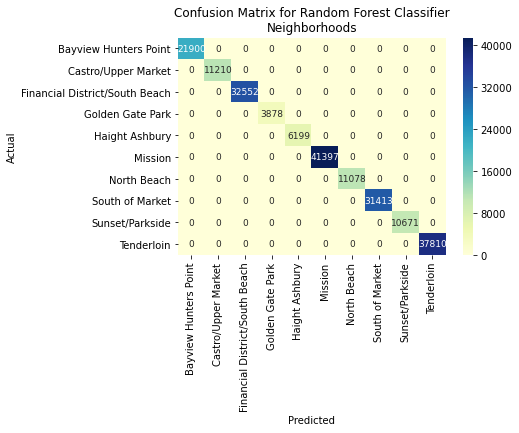

In [230]:
#Make a confusion matrix
confusion_matrix = pd.crosstab(conf_matrix_df['Actual'], conf_matrix_df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
ax = plt.axes()
ax.set_title('Confusion Matrix for Random Forest Classifier\nNeighborhoods')
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 9}, fmt='g', cmap="YlGnBu")

In [231]:
#Find most important features for prediction
feat_import = rf.feature_importances_
feature_importances_df = pd.DataFrame(feat_import,
                                      index = nn_ps_train_features.columns,
                                      columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances_df

,Importance
Number of Pit Stops,0.330086
Latitude,0.144384
Police District,0.127387
Longitude,0.096911
SF Find Neighborhoods,0.078378
Current Police Districts,0.077724
Current Supervisor Districts,0.075394
"Areas of Vulnerability, 2016",0.059007
Address,0.008736
Resolution,0.000654


The most important feature for prediction was Number of Pit Stops.

#### Predicting Incident Category

In [232]:
#10 trees
rf = RandomForestClassifier(n_estimators= 10, oob_score = True)
rf.fit(ic_ps_train_features, ic_ps_train_label)
incident_category_test_pred = rf.predict(ic_ps_test_features)
incident_category_test_actual = ic_ps_test_label

incident_category_train_pred = rf.predict(ic_ps_train_features)
incident_category_train_actual = ic_ps_train_label

#Print accuracy score
rf.oob_score_
print('Training set accuracy score:', accuracy_score(incident_category_train_pred, incident_category_train_actual))
print('Test set accuracy score:', accuracy_score(incident_category_test_pred, incident_category_test_actual))

<ipython-input-232-faed956e451e>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\sdelp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\sdelp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide



Training set accuracy score: 0.9991991312175448
Test set accuracy score: 0.4647586829915236


I will add more trees because the warning message says that "too few trees were used to compute any reliable oob estimates."

In [233]:
#50 trees
rf = RandomForestClassifier(n_estimators= 50, oob_score = True)
rf.fit(ic_ps_train_features, ic_ps_train_label)
incident_category_test_pred = rf.predict(ic_ps_test_features)
incident_category_test_actual = ic_ps_test_label

incident_category_train_pred = rf.predict(ic_ps_train_features)
incident_category_train_actual = ic_ps_train_label

#Print accuracy scores
rf.oob_score_
print('Training set accuracy score:', accuracy_score(incident_category_train_pred, incident_category_train_actual))
print('Test set accuracy score:', accuracy_score(incident_category_test_pred, incident_category_test_actual))

<ipython-input-233-ba432e582b25>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training set accuracy score: 0.9999919913121754
Test set accuracy score: 0.5303015741826359


There was no warning message when I increased the number of trees from 10 to 50. The classifier also did better, going from 39% accuracy to 51%. Next, I will try adding more trees.

In [234]:
#200 trees
rf = RandomForestClassifier(n_estimators= 200, oob_score = True)
rf.fit(ic_ps_train_features, ic_ps_train_label)
incident_category_test_pred = rf.predict(ic_ps_test_features)
incident_category_test_actual = ic_ps_test_label

incident_category_train_pred = rf.predict(ic_ps_train_features)
incident_category_train_actual = ic_ps_train_label

#Print accuracy score
rf.oob_score_
print('Training set accuracy score:', accuracy_score(incident_category_train_pred, incident_category_train_actual))
print('Test set accuracy score:', accuracy_score(incident_category_test_pred, incident_category_test_actual))

<ipython-input-234-c07cb2bfa8f7>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training set accuracy score: 1.0
Test set accuracy score: 0.5455292444307763


In [235]:
#500 trees
rf = RandomForestClassifier(n_estimators= 500, oob_score = True)
rf.fit(ic_ps_train_features, ic_ps_train_label)
incident_category_test_pred = rf.predict(ic_ps_test_features)
incident_category_test_actual = ic_ps_test_label

incident_category_train_pred = rf.predict(ic_ps_train_features)
incident_category_train_actual = ic_ps_train_label

#Print accuracy score
rf.oob_score_
print('Training set accuracy score:', accuracy_score(incident_category_train_pred, incident_category_train_actual))
print('Test set accuracy score:', accuracy_score(incident_category_test_pred, incident_category_test_actual))

<ipython-input-235-fb0957f1bb5f>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training set accuracy score: 1.0
Test set accuracy score: 0.540051319507179


I tried 200 and 500 trees, and the test set accuracy was the same (54%). I don't think adding more trees is going to help.

In [236]:
#Put incident category predictions into a dataframe and replace encoded labels with actual labels
incident_category_test_pred
incident_category_test_pred.shape
incident_category_test_pred_df = pd.DataFrame(incident_category_test_pred, columns = ['Predictions'])
incident_category_test_pred_df['Predictions'].replace(ps_incident_category_dict, inplace = True)
incident_category_test_pred_df

,Predictions
0,LARCENY/THEFT
1,LARCENY/THEFT
2,LARCENY/THEFT
3,DRUG/NARCOTIC
4,OTHER OFFENSES
...,...
208103,OTHER OFFENSES
208104,ASSAULT
208105,MISSING PERSON
208106,ASSAULT


In [237]:
#Put actual incident categories into a dataframe and replace encoded labels with actual labels
incident_category_test_actual
incident_category_test_actual_df = pd.DataFrame(incident_category_test_actual, columns = ['Incident Category'])
incident_category_test_actual_df['Incident Category'].replace(ps_incident_category_dict, inplace = True)
incident_category_test_actual_df = incident_category_test_actual_df.reset_index()
incident_category_test_actual_df.drop(['index'], axis = 1)

,Incident Category
0,LARCENY/THEFT
1,LARCENY/THEFT
2,LARCENY/THEFT
3,DRUG/NARCOTIC
4,OTHER OFFENSES
...,...
208103,TRAFFIC COLLISION
208104,ASSAULT
208105,LOST PROPERTY
208106,MOTOR VEHICLE THEFT


In [238]:
#Make a new dataframe that includes the Actual and Predicted incident categories
conf_matrix_df = pd.DataFrame(columns = ['Actual', 'Predicted'])
conf_matrix_df['Actual'] = incident_category_test_actual_df['Incident Category']
conf_matrix_df['Predicted'] = incident_category_test_pred_df['Predictions']
conf_matrix_df

,Actual,Predicted
0,LARCENY/THEFT,LARCENY/THEFT
1,LARCENY/THEFT,LARCENY/THEFT
2,LARCENY/THEFT,LARCENY/THEFT
3,DRUG/NARCOTIC,DRUG/NARCOTIC
4,OTHER OFFENSES,OTHER OFFENSES
...,...,...
208103,TRAFFIC COLLISION,OTHER OFFENSES
208104,ASSAULT,ASSAULT
208105,LOST PROPERTY,MISSING PERSON
208106,MOTOR VEHICLE THEFT,ASSAULT


<AxesSubplot:title={'center':'Confusion Matrix for Random Forest Classifier\nIncident Categories'}, xlabel='Predicted', ylabel='Actual'>

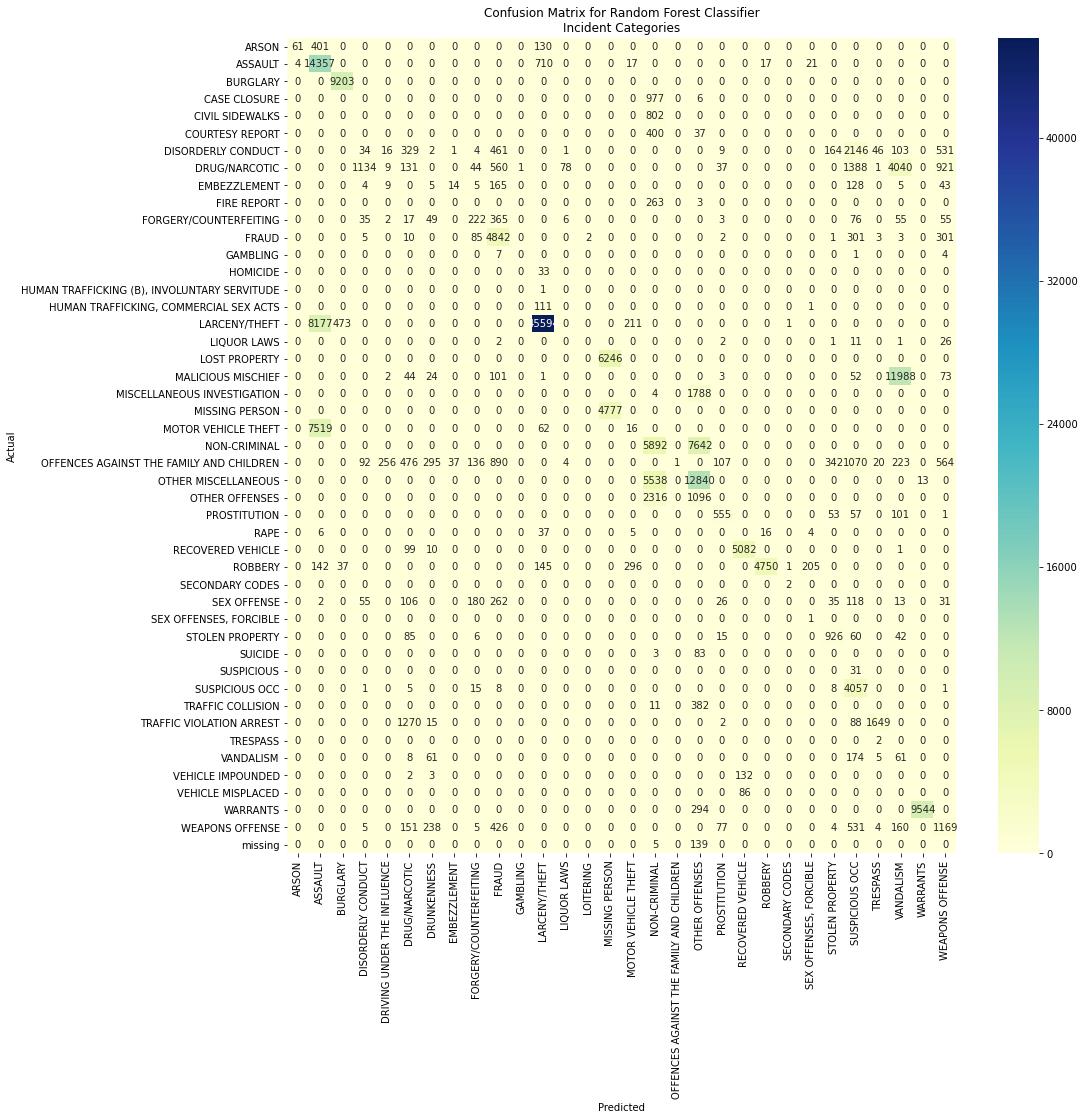

In [239]:
#Make a confusion matrix
confusion_matrix = pd.crosstab(conf_matrix_df['Actual'], conf_matrix_df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (15, 15))
ax = plt.axes()
ax.set_title('Confusion Matrix for Random Forest Classifier\nIncident Categories')
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', cmap="YlGnBu")

In [240]:
#Find most important features for prediction
feat_import = rf.feature_importances_
feature_importances_df = pd.DataFrame(feat_import,
                                      index = ic_ps_train_features.columns,
                                      columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances_df

,Importance
Incident Description,0.481470
Incident Severity Category,0.256363
Resolution,0.080207
Incident Number,0.023989
Latitude,0.023933
Incident Time,0.022944
Address,0.021779
Longitude,0.021144
Incident Date,0.020937
Incident Day of Week,0.009706


The most important feature for prediction was Incident Description.

## Non-Pit Stop Neighborhood sub-dataset

#### Predicting Neighborhood Name

In [241]:
#10 trees
rf = RandomForestClassifier(n_estimators= 10, oob_score = True)
rf.fit(nn_nonps_train_features, nn_nonps_train_label)
neighborhood_test_pred = rf.predict(nn_nonps_test_features)
neighborhood_test_actual = nn_nonps_test_label

neighborhood_train_pred = rf.predict(nn_nonps_train_features)
neighborhood_train_actual = nn_nonps_train_label

#Print accuracy scores
rf.oob_score_
print('Training set accuracy score:', accuracy_score(neighborhood_train_pred, neighborhood_train_actual))
print('Test set accuracy score:', accuracy_score(neighborhood_test_pred, neighborhood_test_actual))

<ipython-input-241-6da76274d07a>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\sdelp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\sdelp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide



Training set accuracy score: 0.9999558054229072
Test set accuracy score: 0.9836852609102201


I will add more trees because the warning message says that "too few trees were used to compute any reliable oob estimates."

In [242]:
#50 trees
rf = RandomForestClassifier(n_estimators= 50, oob_score = True)
rf.fit(nn_nonps_train_features, nn_nonps_train_label)
neighborhood_test_pred = rf.predict(nn_nonps_test_features)
neighborhood_test_actual = nn_nonps_test_label

neighborhood_train_pred = rf.predict(nn_nonps_train_features)
neighborhood_train_actual = nn_nonps_train_label

#Print accuracy scores
rf.oob_score_
print('Training set accuracy score:', accuracy_score(neighborhood_train_pred, neighborhood_train_actual))
print('Test set accuracy score:', accuracy_score(neighborhood_test_pred, neighborhood_test_actual))

<ipython-input-242-0670aded826b>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training set accuracy score: 1.0
Test set accuracy score: 0.9881442507640992


In [243]:
#Put neighborhood predictions into a dataframe and replace encoded labels with original labels
neighborhood_test_pred
neighborhood_test_pred.shape
neighborhood_test_pred_df = pd.DataFrame(neighborhood_test_pred, columns = ['Predictions'])
neighborhood_test_pred_df['Predictions'].replace(nonps_neighborhood_name_dict, inplace = True)
neighborhood_test_pred_df

,Predictions
0,Western Addition
1,Russian Hill
2,Mission Bay
3,Inner Richmond
4,Hayes Valley
...,...
143301,Bernal Heights
143302,Twin Peaks
143303,Twin Peaks
143304,Hayes Valley


In [244]:
#Put actual neighborhoods into a dataframe and replace encoded labels with original labels
neighborhood_test_actual
neighborhood_test_actual_df = pd.DataFrame(neighborhood_test_actual, columns = ['Neighborhood Name'])
neighborhood_test_actual_df['Neighborhood Name'].replace(nonps_neighborhood_name_dict, inplace = True)
neighborhood_test_actual_df = neighborhood_test_actual_df.reset_index()
neighborhood_test_actual_df.drop(['index'], axis = 1)

,Neighborhood Name
0,Western Addition
1,Russian Hill
2,Mission Bay
3,Inner Richmond
4,Hayes Valley
...,...
143301,Bernal Heights
143302,Twin Peaks
143303,Twin Peaks
143304,Hayes Valley


In [245]:
#Make a new dataframe that includes the Actual and Predicted neighborhoods
conf_matrix_df = pd.DataFrame(columns = ['Actual', 'Predicted'])
conf_matrix_df['Actual'] = neighborhood_test_actual_df['Neighborhood Name']
conf_matrix_df['Predicted'] = neighborhood_test_pred_df['Predictions']
conf_matrix_df

,Actual,Predicted
0,Western Addition,Western Addition
1,Russian Hill,Russian Hill
2,Mission Bay,Mission Bay
3,Inner Richmond,Inner Richmond
4,Hayes Valley,Hayes Valley
...,...,...
143301,Bernal Heights,Bernal Heights
143302,Twin Peaks,Twin Peaks
143303,Twin Peaks,Twin Peaks
143304,Hayes Valley,Hayes Valley


<AxesSubplot:title={'center':'Confusion Matrix for Random Forest Classifier\nNeighborhoods'}, xlabel='Predicted', ylabel='Actual'>

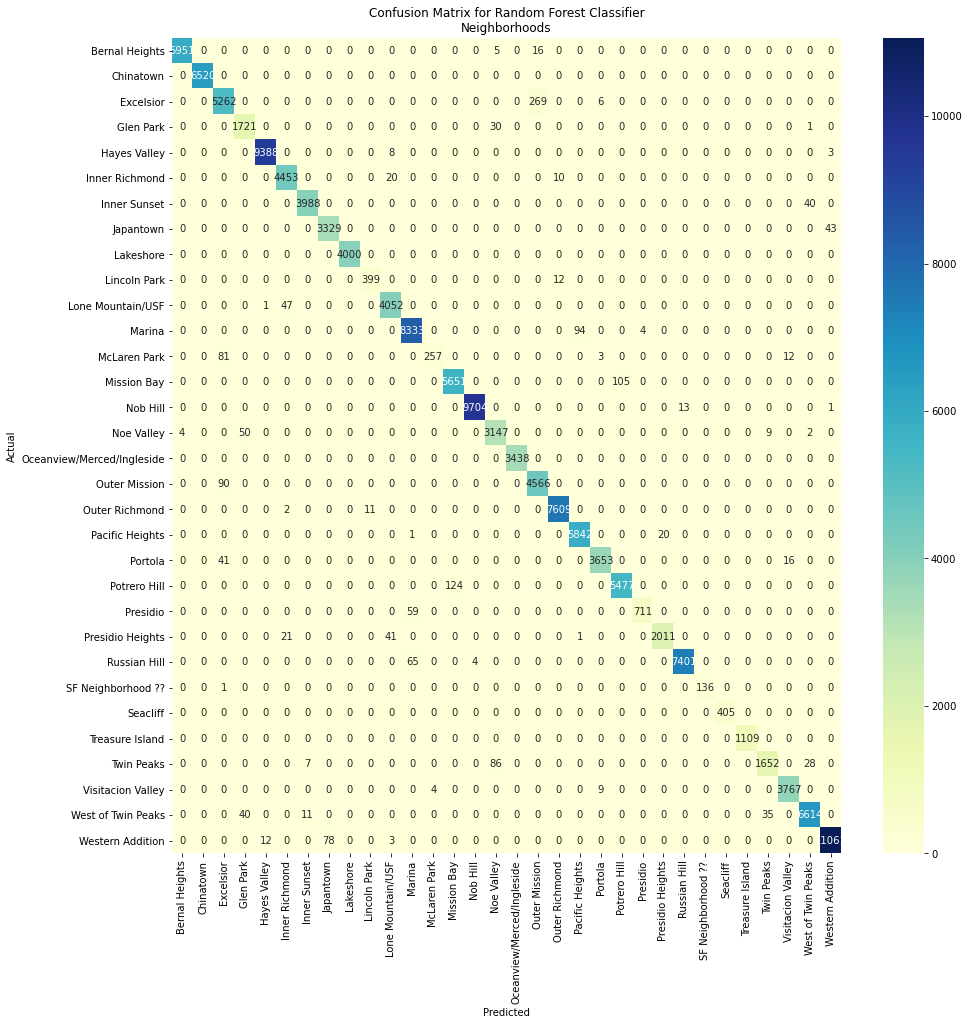

In [246]:
#Make a confusion matrix
confusion_matrix = pd.crosstab(conf_matrix_df['Actual'], conf_matrix_df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (15, 15))
ax = plt.axes()
ax.set_title('Confusion Matrix for Random Forest Classifier\nNeighborhoods')
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', cmap="YlGnBu")

In [247]:
#Find most important features for prediction
feat_import = rf.feature_importances_
feature_importances_df = pd.DataFrame(feat_import,
                                      index = nn_nonps_train_features.columns,
                                      columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances_df

,Importance
Latitude,0.229089
SF Find Neighborhoods,0.202527
Longitude,0.186662
Current Supervisor Districts,0.124670
Current Police Districts,0.081524
Police District,0.072677
"Areas of Vulnerability, 2016",0.064497
Address,0.027052
Incident Number,0.001946
Incident Date,0.001880


The most important feature for prediction was Latitude.

#### Predicting Incident Category

In [248]:
#10 trees
rf = RandomForestClassifier(n_estimators= 10, oob_score = True)
rf.fit(ic_nonps_train_features, ic_nonps_train_label)
incident_category_test_pred = rf.predict(ic_nonps_test_features)
incident_category_test_actual = ic_nonps_test_label

incident_category_train_pred = rf.predict(ic_nonps_train_features)
incident_category_train_actual = ic_nonps_train_label

#Print accuracy score
rf.oob_score_
print('Training set accuracy score:', accuracy_score(incident_category_train_pred, incident_category_train_actual))
print('Test set accuracy score:', accuracy_score(incident_category_test_pred, incident_category_test_actual))

<ipython-input-248-71fb06030788>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\sdelp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\sdelp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide



Training set accuracy score: 0.9990346973950786
Test set accuracy score: 0.8051930833321703


I will add more trees because the warning message says that "too few trees were used to compute any reliable oob estimates."

In [249]:
#50 trees
rf = RandomForestClassifier(n_estimators= 50, oob_score = True)
rf.fit(ic_nonps_train_features, ic_nonps_train_label)
incident_category_test_pred = rf.predict(ic_nonps_test_features)
incident_category_test_actual = ic_nonps_test_label

incident_category_train_pred = rf.predict(ic_nonps_train_features)
incident_category_train_actual = ic_nonps_train_label

#Print accuracy score
rf.oob_score_
print('Training set accuracy score:', accuracy_score(incident_category_train_pred, incident_category_train_actual))
print('Test set accuracy score:', accuracy_score(incident_category_test_pred, incident_category_test_actual))

<ipython-input-249-898df263f002>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training set accuracy score: 0.9999953479392534
Test set accuracy score: 0.895873166510823


The accuracy score increased when the number of trees increased from 10 to 50 so I will try adding more trees to see if it helps with accuracy.

In [250]:
#150 trees
rf = RandomForestClassifier(n_estimators= 150, oob_score = True)
rf.fit(ic_nonps_train_features, ic_nonps_train_label)
incident_category_test_pred = rf.predict(ic_nonps_test_features)
incident_category_test_actual = ic_nonps_test_label

incident_category_train_pred = rf.predict(ic_nonps_train_features)
incident_category_train_actual = ic_nonps_train_label

#Print accuracy score
rf.oob_score_
print('Training set accuracy score:', accuracy_score(incident_category_train_pred, incident_category_train_actual))
print('Test set accuracy score:', accuracy_score(incident_category_test_pred, incident_category_test_actual))

<ipython-input-250-58d8b99d68d0>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training set accuracy score: 1.0
Test set accuracy score: 0.8988597825631864


In [251]:
#Put incident category predictions into a dataframe and replace encoded labels with original labels
incident_category_test_pred
incident_category_test_pred.shape
incident_category_test_pred_df = pd.DataFrame(incident_category_test_pred, columns = ['Predictions'])
incident_category_test_pred_df['Predictions'].replace(nonps_incident_category_dict, inplace = True)
incident_category_test_pred_df

,Predictions
0,MALICIOUS MISCHIEF
1,LARCENY/THEFT
2,ASSAULT
3,LARCENY/THEFT
4,NON-CRIMINAL
...,...
143301,BURGLARY
143302,LARCENY/THEFT
143303,OTHER OFFENSES
143304,ASSAULT


In [252]:
#Put actual incident categories into a dataframe and replace encoded labels with original labels
incident_category_test_actual
incident_category_test_actual_df = pd.DataFrame(incident_category_test_actual, columns = ['Incident Category'])
incident_category_test_actual_df['Incident Category'].replace(nonps_incident_category_dict, inplace = True)
incident_category_test_actual_df = incident_category_test_actual_df.reset_index()
incident_category_test_actual_df.drop(['index'], axis = 1)

,Incident Category
0,STOLEN PROPERTY
1,LARCENY/THEFT
2,ASSAULT
3,LARCENY/THEFT
4,NON-CRIMINAL
...,...
143301,BURGLARY
143302,LARCENY/THEFT
143303,OTHER OFFENSES
143304,ASSAULT


In [253]:
#Make a new dataframe that includes the Actual and Predicted neighborhoods
conf_matrix_df = pd.DataFrame(columns = ['Actual', 'Predicted'])
conf_matrix_df['Actual'] = incident_category_test_actual_df['Incident Category']
conf_matrix_df['Predicted'] = incident_category_test_pred_df['Predictions']
conf_matrix_df

,Actual,Predicted
0,STOLEN PROPERTY,MALICIOUS MISCHIEF
1,LARCENY/THEFT,LARCENY/THEFT
2,ASSAULT,ASSAULT
3,LARCENY/THEFT,LARCENY/THEFT
4,NON-CRIMINAL,NON-CRIMINAL
...,...,...
143301,BURGLARY,BURGLARY
143302,LARCENY/THEFT,LARCENY/THEFT
143303,OTHER OFFENSES,OTHER OFFENSES
143304,ASSAULT,ASSAULT


<AxesSubplot:title={'center':'Confusion Matrix for Random Forest Classifier\nIncident Categories'}, xlabel='Predicted', ylabel='Actual'>

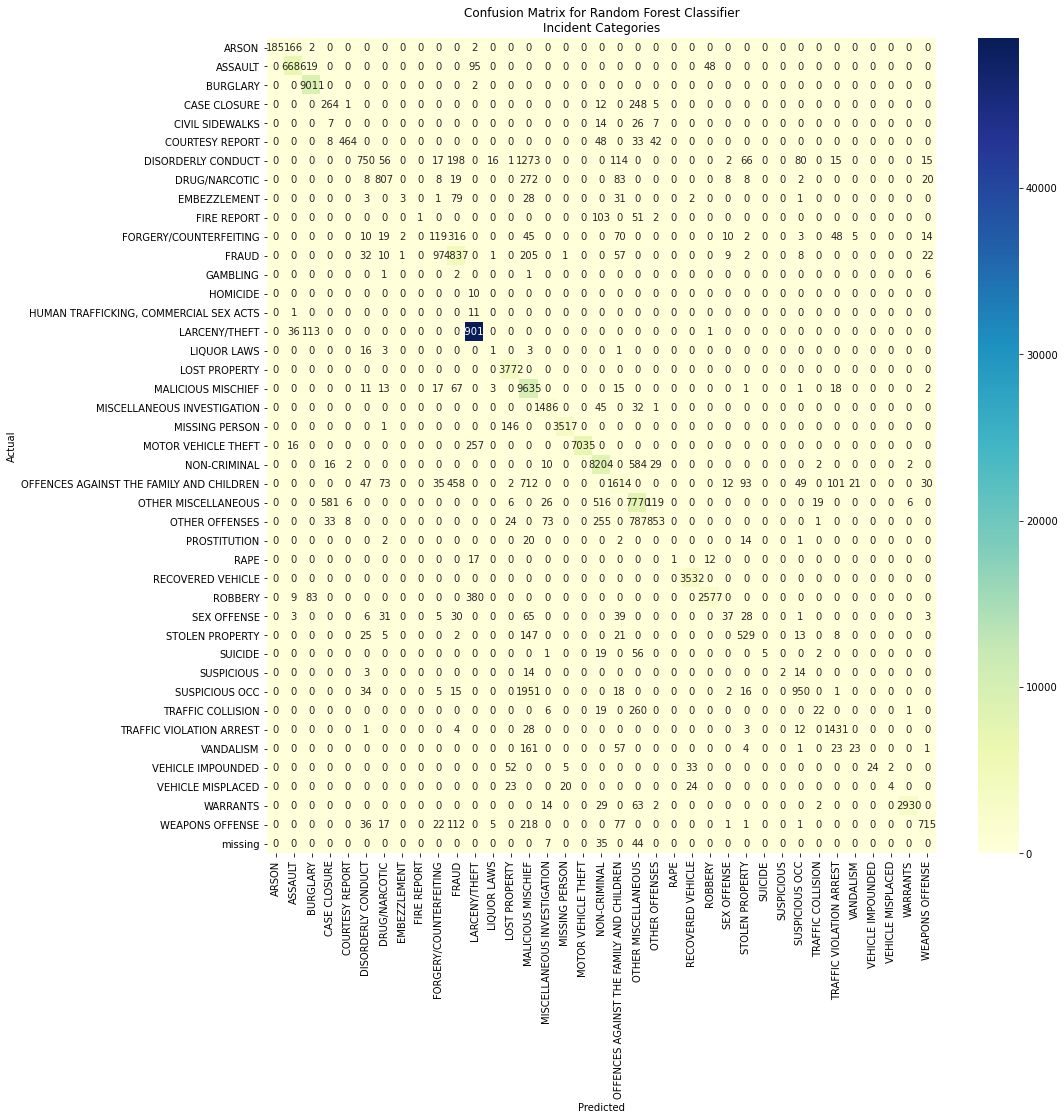

In [254]:
#Make a confusion matrix
confusion_matrix = pd.crosstab(conf_matrix_df['Actual'], conf_matrix_df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (15, 15))
ax = plt.axes()
ax.set_title('Confusion Matrix for Random Forest Classifier\nIncident Categories')
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 10}, fmt='g', cmap="YlGnBu")

In [255]:
#Find most important features for prediction
feat_import = rf.feature_importances_
feature_importances_df = pd.DataFrame(feat_import,
                                      index = ic_nonps_train_features.columns,
                                      columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances_df

,Importance
Incident Description,0.496855
Incident Severity Category,0.249076
Resolution,0.066250
Incident Number,0.026574
Address,0.026047
Incident Date,0.023251
Incident Time,0.022491
Latitude,0.021813
Longitude,0.018669
Incident Year,0.010134


The most important feature for prediction was Incident Description.